<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 2: Análisis exploratorios de los datos

El notebook de análisis exploratorio es una herramienta fundamental en la consecución de nuestro objetivo general, el cual busca desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros. 
Entre los objetvos específicos se encuentra realizar un análisis exploratorio de los datos, en donde se busca: 
* Visualización de los datos con el fin de descubrir patrones y tendencias que permitan comprender mejor el comportamiento de los usuarios en Twitter y la relación entre los términos y las emociones expresadas en los tweets.
* Identificar patrones y características relevantes para la detección de emociones, tales como las palabras más comunes asociadas con cada emoción y las tendencias de frecuencia de las emociones a lo largo del tiempo.

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

Se dispone de un conjunto de datos proveniente de data.world, una plataforma que proporciona acceso a conjuntos de datos públicos. Este dataset consiste en una colección de tweets etiquetados con la emoción que expresan. Contiene cuatro columnas que incluyen el identificador del tweet, el sentimiento expresado, el autor y el contenido del tweet. En total, se tienen 40,000 registros con anotaciones para 13 emociones distintas. 

<img src="Notebook.jpg">

---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image
import spacy
nlp = spacy.load("en_core_web_sm")

import re
import string

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon') #Analysis with Vader

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

#import librerias de frecuencias
from nltk.probability import FreqDist

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

#import librerias Sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already u

---

<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [2]:
emotion_data= pd.read_csv('text_emotion.csv')

In [3]:
emotion_data

tweet_id   sentiment         author  \
0      1956967341       empty     xoshayzers   
1      1956967666     sadness      wannamama   
2      1956967696     sadness      coolfunky   
3      1956967789  enthusiasm    czareaquino   
4      1956968416     neutral      xkilljoyx   
...           ...         ...            ...   
39995  1753918954     neutral  showMe_Heaven   
39996  1753919001        love       drapeaux   
39997  1753919005        love       JenniRox   
39998  1753919043   happiness       ipdaman1   
39999  1753919049        love    Alpharalpha   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the mommies out ther...  
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...  
39999  @mopedronin bullet train from tokyo    the gf ...  

[40000 rows x 4 columns]

<h3>Observaciones:</h3>

   * El dataset posee 40000 filas y 4 columnas. 
   * Se verificará los tipos las variables. 
   * Se verificará si hay valores nulos o NaN, así como si existen valores duplicados.  
   * Se verificaran los tipos de variables.
   * Se determinará las variables o atributos que utilizaran para la preparación de los modelos.

## 1. Preparación del Dataset

In [4]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


### 1.1 Verificar nulos y NaM

In [5]:
emotion_data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [6]:
emotion_data.isna().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

### 1.2 Verificar datos duplicados

In [7]:
emotion_data[emotion_data.duplicated()]

Empty DataFrame
Columns: [tweet_id, sentiment, author, content]
Index: []

### 1.3 Agregar nuevas columnas

* **Longitud de tweet**

Para la revsion exploratoria se creará una columna que permita medir la longitud de los tweet('content') para verificar si la longitud del tweet afecta en el tipo de emocion. 

In [8]:
emotion_data['review_length'] = emotion_data.content.apply(len)

In [9]:
emotion_data.head(10)

tweet_id   sentiment         author  \
0  1956967341       empty     xoshayzers   
1  1956967666     sadness      wannamama   
2  1956967696     sadness      coolfunky   
3  1956967789  enthusiasm    czareaquino   
4  1956968416     neutral      xkilljoyx   
5  1956968477       worry  xxxPEACHESxxx   
6  1956968487     sadness       ShansBee   
7  1956968636       worry       mcsleazy   
8  1956969035     sadness    nic0lepaula   
9  1956969172     sadness     Ingenue_Em   

                                             content  review_length  
0  @tiffanylue i know  i was listenin to bad habi...             92  
1  Layin n bed with a headache  ughhhh...waitin o...             60  
2                Funeral ceremony...gloomy friday...             35  
3               wants to hang out with friends SOON!             36  
4  @dannycastillo We want to trade with someone w...             86  
5  Re-pinging @ghostridah14: why didn't you go to...             84  
6  I should be sleep, but im not! thinking about ...            132  
7               Hmmm. http://www.djhero.com/ is down             36  
8            @charviray Charlene my love. I miss you             39  
9         @kelcouch I'm sorry  at least it's Friday?             42

### 1.4 Cambiar nombre columna sentiment y cambiar orden de las columnas

In [10]:
# Renombrar la columna "sentiment" a "sentiment_label"
emotion_data = emotion_data.rename(columns={'sentiment': 'sentiment_label'})

In [11]:
# Reordenar las columnas 
emotion_data = emotion_data[['tweet_id', 'author', 'review_length', 'sentiment_label', 'content']]
emotion_data

tweet_id         author  review_length sentiment_label  \
0      1956967341     xoshayzers             92           empty   
1      1956967666      wannamama             60         sadness   
2      1956967696      coolfunky             35         sadness   
3      1956967789    czareaquino             36      enthusiasm   
4      1956968416      xkilljoyx             86         neutral   
...           ...            ...            ...             ...   
39995  1753918954  showMe_Heaven             16         neutral   
39996  1753919001       drapeaux             30            love   
39997  1753919005       JenniRox            123            love   
39998  1753919043       ipdaman1            122       happiness   
39999  1753919049    Alpharalpha            132            love   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the mommies out ther...  
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...  
39999  @mopedronin bullet train from tokyo    the gf ...  

[40000 rows x 5 columns]

<h3>Observaciones:</h3>

   * El sentimiento, con 13 categorías de emociones, es el objetivo y el contenido es la caracterisca a evaluar.
   * Se puede observar que el data set no tiene valores nulos o NaN. 
   * Se puede observar que el data set no tiene valores duplicados.  
   * Las variables de importancia para el estudio son del tipo objeto. 
   * El dataset posee 40000 filas y 4 columnas.

## 2. Descripción estadística y visualización global de las variables.

In [12]:
emotion_data.describe(include = 'object').T

count unique  \
author           40000  33871   
sentiment_label  40000     13   
content          40000  39827   

                                                               top  freq  
author                                                 MissxMarisa    23  
sentiment_label                                            neutral  8638  
content          I just received a mothers day card from my lov...    14

In [13]:
# Print the number of unique values of tweet_id
emotion_data.tweet_id.nunique()

40000

In [14]:
# Print the number of unique values of author
emotion_data.author.nunique()

33871

**Observaciones:**

* En este proyecto, se ha analizado un conjunto de datos de 40,000 instancias que contienen información sobre autores, contenidos y sentimientos. 

* También es posible utilizar al autor como una variable, dado que algunas personas tienden a expresar emociones similares en Twitter. Sin embargo, la mayoría de los autores en el conjunto de datos solo han tuiteado una vez. Por lo tanto, no lo utilizaré como una variable.

* El tweet_id es único, como se esperaba, aunque algunos autores tienen varios tweets asociados con el mismo tweet_id. Podríamos eliminar la columna tweet_id para el análisis, ya que solo es un índice. A pesar de esto, mantendré la columna de autor.

* En la columna de contenido, hay valores que aparecen más de una vez, lo que significa que hay tweets idénticos asociados con diferentes tweet_ids.

* Parece que no hay valores faltantes en los datos. Sin embargo, continuaré investigando para detectar valores faltantes o entradas incorrectas

* De los 13 valores únicos presentes en la columna de sentimiento, la mayoría de las instancias (8,638) corresponden a un sentimiento neutral. Hay una emoción llamada "empty" en los datos. La analizaré para entender lo que realmente significa.

* En cuanto a los autores, se encontraron 33,871 valores únicos en la columna correspondiente, siendo el autor con mayor frecuencia la usuaria "MissxMarisa", con 23 apariciones en el conjunto de datos. 

### 2.1 Análisis Univariable

#### 2.1.1 Emoción (Sentiment_label)

In [15]:
# Print the count and the ratio of the emotion
pd.DataFrame([emotion_data.sentiment_label.value_counts(), emotion_data.sentiment_label.value_counts(normalize=True)]).T

sentiment_label  sentiment_label
neutral              8638.0         0.215950
worry                8459.0         0.211475
happiness            5209.0         0.130225
sadness              5165.0         0.129125
love                 3842.0         0.096050
surprise             2187.0         0.054675
fun                  1776.0         0.044400
relief               1526.0         0.038150
hate                 1323.0         0.033075
empty                 827.0         0.020675
enthusiasm            759.0         0.018975
boredom               179.0         0.004475
anger                 110.0         0.002750

* **Distribución de las etiquetas en el conjunto de datos.**

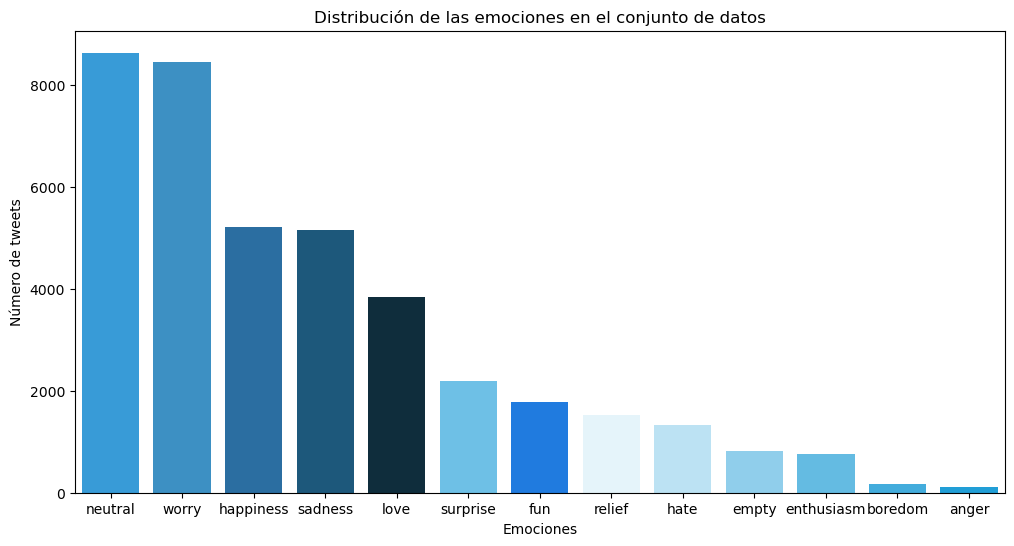

In [16]:
# Crear un colormap de azules de Twitter
cmap = sns.color_palette(['#1DA1F2', '#2795D9', '#1771B5', '#0D5C8B', '#073044', '#5AC8FA', '#007AFF', '#E1F5FE', '#B3E5FC', 
                          '#81D4FA', '#4FC3F7', '#29B6F6', '#03A9F4'])


# Contar el número de tweets por emoción
emotions_count = emotion_data['sentiment_label'].value_counts()

# Visualizar la distribución de las emociones
plt.figure(figsize=(12,6))
sns.barplot(x=emotions_count.index, y=emotions_count.values, palette=sns.color_palette(cmap))
plt.title('Distribución de las emociones en el conjunto de datos')
plt.xlabel('Emociones')
plt.ylabel('Número de tweets')

#salvar el grafico
plt.savefig('distemociones.png', dpi=300, figsize=(12,6))

plt.show()

El gráfico "Distribución de las emociones en el conjunto de datos" evidencia un desbalance significativo entre las etiquetas de emociones en el conjunto de datos. Las emociones "neutral" y "worry" representan la mayoría de los tweets con un 21 % cada uno sobre el dataset, mientras que las emociones "boredom" y "anger" son las menos representadas con un 0.4% y 0.2% respectivamente, lo que puede afectar negativamente el rendimiento de los algoritmos de machine learning utilizados para el análisis de sentimientos.

El desbalance de clases puede llevar a un sesgo hacia las clases dominantes, resultando en una clasificación incorrecta de las clases minoritarias. Si bien el entrenamiento con un conjunto de datos desbalanceado y la evaluación con uno equilibrado puede producir resultados pobres en la clasificación de las emociones minoritarias, la solución puede ser la recopilación de datos adicionales o el uso de técnicas de muestreo.

Existen algunas opciones para abordar el problema de desbalance de clases en el conjunto de datos:

* La primera es realizar una reclasificación de las emociones agrupandos en sentimientos: positivas, neutrales y negativas en cada clase, lo que podría reducir el desbalance y mejorar el rendimiento de los algoritmos de clasificación de sentimientos. 

* La segunda opción es aplicar análisis de sentimiento y polaridad a los tweets y utilizar estos resultados para realizar una reclasificación más precisa.

En conclusión, el desbalance de clases es un problema común en el análisis de sentimientos y es importante abordarlo cuidadosamente para obtener resultados precisos y confiables.

* **Emoción "empty"**:

Entre las emociones se tiene una emoción llamada "empty", la cual se analizará a mayor profundidad para entender su significado.

In [17]:
# Print head of the tweets with sentiment "empty"
emotion_data[emotion_data.sentiment_label == 'empty'].head()

tweet_id      author  review_length sentiment_label  \
0    1956967341  xoshayzers             92           empty   
44   1956978276      Aggie9            116           empty   
52   1956979917  Dreness023             39           empty   
141  1957000336       Gen22             87           empty   
180  1957007357       _SNO_             45           empty   

                                               content  
0    @tiffanylue i know  i was listenin to bad habi...  
44   @creyes middle school and elem. High schools w...  
52             @djmicdamn hey yu lil fucker i textd yu  
141  @softtouchme just answered you- never learned ...  
180      Have a headache  I'm going to bed. Goodnight!

In [18]:
# Investigate empty
emotion_data[emotion_data.sentiment_label == 'empty'].sample(20)

tweet_id          author  review_length sentiment_label  \
920    1957174342      ErictheAzn             50           empty   
6024   1961126569       dinorahlh            134           empty   
36163  1753254884       tttsarina             15           empty   
16341  1965310104      karmachord             42           empty   
38695  1753695855       VetaKniaz             87           empty   
5230   1960701835        adrateia             14           empty   
34828  1752964133      crosshaire             64           empty   
34414  1752870733     numbnuggets             98           empty   
33403  1752592710  MyCheMicALmuse             25           empty   
4648   1960463164          jcpwee             22           empty   
18813  1966085033  Patchworkwords            101           empty   
9225   1962463416     BonesFan021             33           empty   
25195  1695028557     sam_ward_is             80           empty   
24689  1694904273   RHCP_Universe            119           empty   
10516  1962928418      rhemingway            111           empty   
18931  1966111699   KristalAshely             44           empty   
7011   1961521707       JessLynnn            137           empty   
15669  1964950585       BABIxGIRL            112           empty   
26140  1695310916    jaimehorwitz            132           empty   
24285  1694811590      thewaiting             31           empty   

                                                 content  
920    @allyycase I'm trying to sleep!!! It's not wor...  
6024   Female and Male 3 year old Labs looking for ne...  
36163                                    Is @ the pantry  
16341         @stevyncolgan What are you confused about?  
38695  Going to Al Ain.  Need to check out one store....  
5230                                      @ShakeYourJunk  
34828  @jsyadao Soooooo true. I don't dare ask for so...  
34414  ...normal hours to give any interested twitter...  
33403                          @JohnnyDeppNews EXACTLY!!  
4648                              25 hours and counting.  
18813  had to rumage around topless in the freezer to...  
9225                   @Bookwormlady2  are you not well?  
25195  @mizzannabel im not a supermodel, i still eat ...  
24689  @EmmaGriffiths86 It's under Community.. I can'...  
10516  feel so out of the loop. no twitter on my desk...  
18931       @DeckEnt  there wasn't enough room for me...  
7011   Can't even tell you how much this hair dresser...  
15669  tired as heck, i wanna go home and sleep but i...  
26140  Lots of tasks to complete today. First, weclom...  
24285                    Just made the perfect fried egg

In [19]:
# Number of observations with "empty" sentiment
emotion_data[emotion_data.sentiment_label == 'empty'].shape[0]

827

Al analizar el contenido de los tweets, se puede concluir que la etiqueta "empty" no representa necesariamente una emoción neutral. De hecho, se han encontrado distintos tipos de emociones expresadas en los tweets catalogados como "empty". A pesar de que estos tweets no representan una proporción significativa del conjunto de datos, se recomienda eliminar las filas etiquetadas como "empty" para evitar posibles sesgos o confusiones en el análisis de emociones.

#### 2.1.2 Análisis del texto(content)

* **Número de caracteres**

In [20]:
# Describe the length of the tweets in the contents column.
emotion_data.content.str.len().describe()

count    40000.000000
mean        73.405550
std         36.558015
min          1.000000
25%         43.000000
50%         69.000000
75%        103.000000
max        167.000000
Name: content, dtype: float64

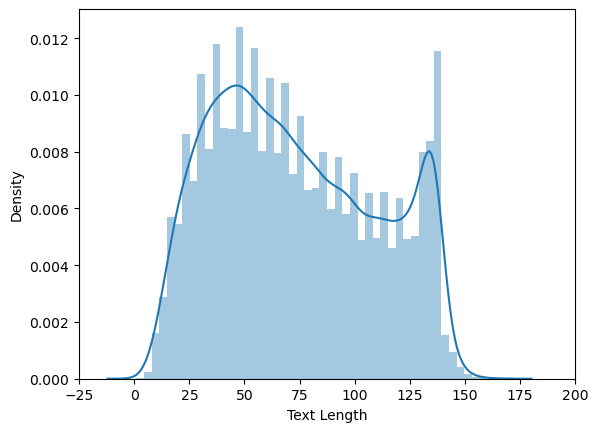

In [21]:
sns.distplot(emotion_data['review_length'])
plt.xlim([-25, 200]);
plt.xlabel('Text Length')

#salvar el grafico
plt.savefig('histlongitud.png', dpi=300, figsize=(12,6))

plt.show()

El histograma anterior muestra que la longitud del tweet oscila entre 0 y 175 caracteres. 

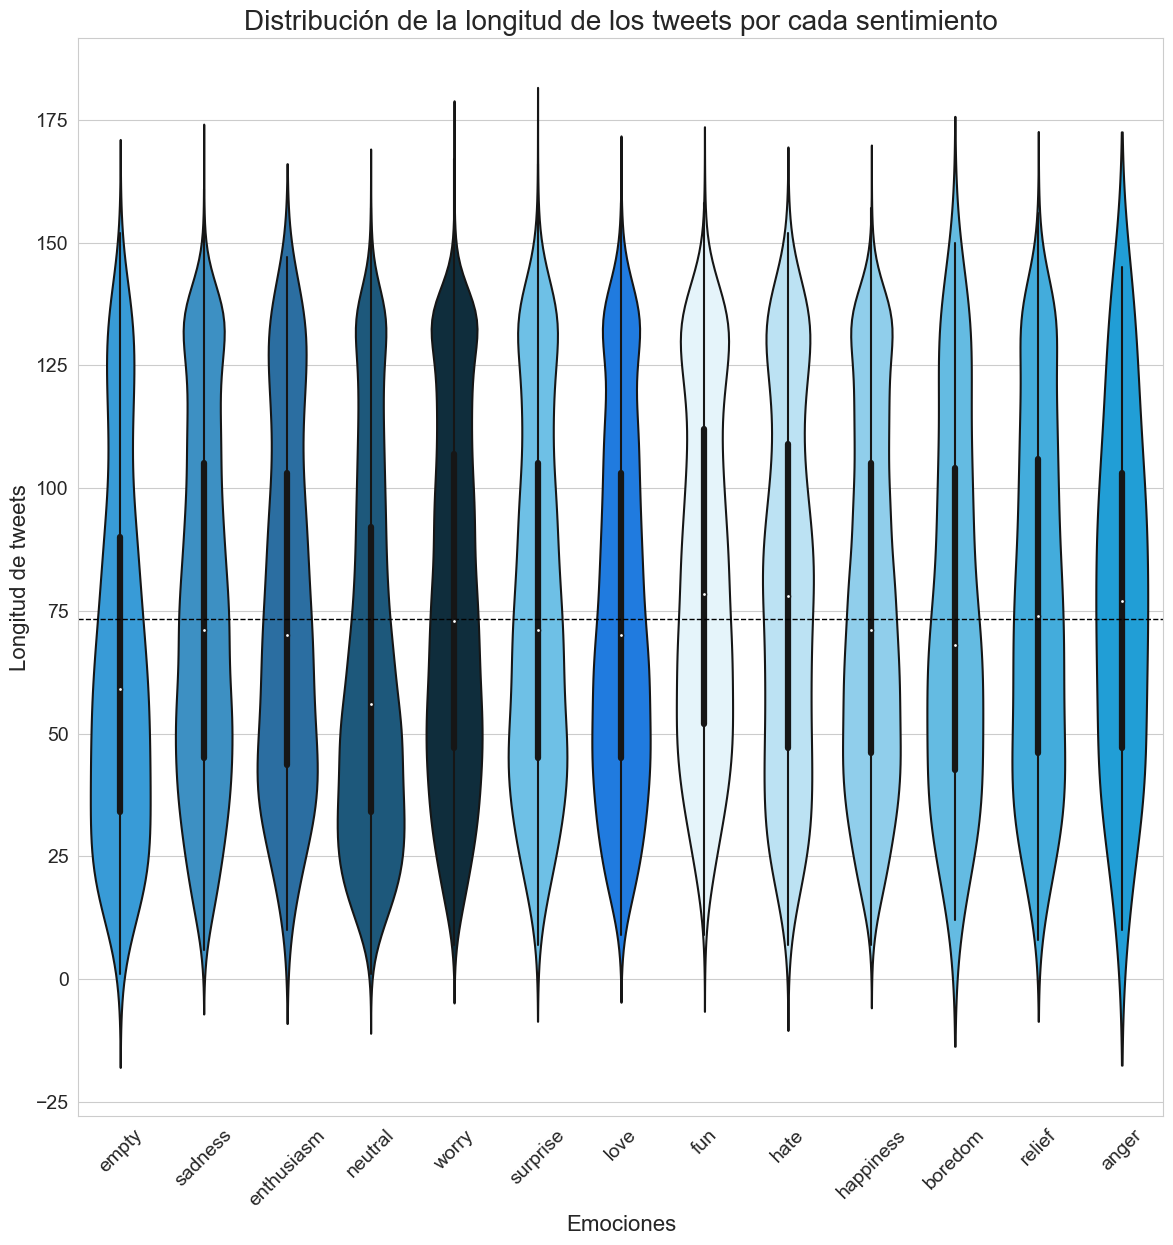

In [23]:
# Calcular la media de la longitud de los tweets
mean_length = emotion_data['review_length'].mean()

# Definir la paleta de colores de Twitter
cmap = sns.color_palette(['#1DA1F2', '#2795D9', '#1771B5', '#0D5C8B', '#073044', '#5AC8FA', '#007AFF', '#E1F5FE', '#B3E5FC', 
                          '#81D4FA', '#4FC3F7', '#29B6F6', '#03A9F4'])

# Configurar el estilo de Seaborn
sns.set_style('whitegrid')

# Cambiar el tamaño de la fuente de las etiquetas del eje Y
plt.rc('xtick', labelsize=14)

# Rotar las etiquetas del eje Y en 45 grados
plt.xticks(rotation=45)

# Generar el violinplot
sns.violinplot(x='sentiment_label', y='review_length', data=emotion_data, palette=cmap)

# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (16,16)
plt.rcParams.update({'font.size': 16})

# Agregar la línea horizontal en la posición de la media
plt.axhline(mean_length, color='black', linestyle='dashed', linewidth=1)

plt.title('Distribución de la longitud de los tweets por cada sentimiento', fontsize=20)
plt.xlabel('Emociones', fontsize=16)
plt.ylabel('Longitud de tweets', fontsize=16)

#salvar el grafico
plt.savefig('distlongitud.png', dpi=300, figsize=(14, 14))

# Mostrar el gráfico
plt.show()

En el analisis descriptivo de la longitu del texto se pued eobservar que hay tweet que contienen 1 solo caracter, por lo que se removeran. 

El gráfico muestra la distribución de la longitud de los tweets para cada una de las emociones preclasificadas. En general, se puede observar que la longitud de los tweets es muy similar en todas las emociones, con una media general de 74 caracteres. Esto sugiere que la longitud del tweet no afecta significativamente la emoción expresada en el mismo, sin embargo Puede ser extremadamente difícil detectar sentimientos en un texto de este tipo.

Además, se puede apreciar que la mayoría de los tweets se concentran en la región central de los violinplots, lo que indica que la mayoría de los tweets tienen una longitud similar para cada una de las emociones preclasificadas.

También se ha utilizado una paleta de colores de Twitter para distinguir visualmente cada una de las emociones. Se ha agregado una línea horizontal que representa la media de la longitud de los tweets para que se pueda comparar fácilmente la distribución de cada emoción con la media general.

En general, este gráfico es útil para explorar la relación entre la longitud de los tweets y la emoción preclasificada, y sugiere que la longitud del tweet no es un factor crítico en la identificación de la emoción expresada en el mismo, es decir,  no es un poderoso indicador de polaridad.

In [24]:
# Print tweets with less than 5 characters
emotion_data[emotion_data.review_length<5]

tweet_id           author  review_length sentiment_label content
340    1957042734          Kayleia              1           empty       0
15028  1964712204  KimberlyBarrena              1         neutral       0
29869  1751394197       JaBrezzy96              1         neutral       0
39415  1753819910     superbot5000              1         neutral       0

Es importante señalar que se han identificado tweets que contienen únicamente un carácter, los cuales pueden resultar irrelevantes para el análisis de sentimientos. Por lo tanto, se recomienda proceder a su eliminación del conjunto de datos, ya que su inclusión podría generar ruido y afectar la calidad de los resultados obtenidos en el análisis.

In [25]:
# Print tweets with less than 10 characters
emotion_data[emotion_data.content.str.len()<10].sample(20)

tweet_id           author  review_length sentiment_label    content
18446  1965969489        pooh2hawt              9         sadness  head hurt
15034  1964713679    anthunguyen09              9        surprise  so tired!
16075  1965217805    jordanjustify              8         neutral   Yeah  :p
26073  1695280992      mimonami404              9         neutral  bath time
14476  1964545369   misfit_narciss              7         neutral    Waiting
37284  1753466315          NofarSh              7         neutral    At Home
31954  1752124356            Arhum              8         neutral   painting
33849  1752723843    AngelicaBeanz              8         neutral   @shaevvv
27877  1695962742       Consuelovm              7         neutral    @romrod
31367  1751920589           izak09              7        surprise    Really!
32875  1752443069  verbumveritatis              9         neutral  Thank you
15432  1964839599  darkkatpouncing              9         neutral  @scearley
30368  1751573105        HazyChelz              8           empty   Relaxing
13071  1963867498        Monikar10              7         neutral    Annoyed
23415  1694608833     trackcycling              9         neutral  @leepovey
29996  1751430793     Wonderfuller              9         sadness  With alex
11458  1963220792   damooseisloose              9         neutral  By newark
17383  1965649045        slvrleo21              8         neutral   homework
6265   1961212760     taylor_bsstt              8         neutral   Cleaning
14019  1964301471    XxCharlie16xX              7         neutral    please?

Se ha identificado que algunos tweets contienen solamente menciones, lo cual podría dificultar el análisis de sentimientos al no contar con suficiente información sobre el contenido emocional del tweet. Por lo tanto, se sugiere considerar la eliminación de dichos tweets del conjunto de datos para mejorar la calidad del análisis.

No obstante, también existe la posibilidad de asignar un sentimiento neutral a los tweets que contienen únicamente menciones. Es importante tener en cuenta que, aunque estos tweets pueden parecer neutrales, algunos de ellos podrían contener información emocional relevante que debemos considerar en el análisis de sentimientos. Por lo tanto, es necesario aplicar un criterio riguroso para decidir si se eliminan o se clasifican como sentimiento neutral.

In [26]:
# Number of tweets with only mentions bu no other text
emotion_data[emotion_data.content.str.replace("@[^\s]+", "").str.len() < 2].shape[0]

81

In [27]:
# Print tweets with only mentions (and + 0, or 1 characters)
emotion_data[emotion_data.content.str.replace("@[^\s]+", "").str.len() < 2].sample(10)

tweet_id           author  review_length sentiment_label  \
340    1957042734          Kayleia              1           empty   
14100  1964333615    HollywoodWill              8         neutral   
31109  1751821018            teaix              8         neutral   
16698  1965424705     mike__miller             10         neutral   
8837   1962321958    Snoopthesnoop             10         neutral   
7143   1961552087    lipstickscars             13         neutral   
33729  1752697919  MercyStreetTeam             16           empty   
31852  1752088394          phaoloo             12           empty   
29372  1751178947         tlwest70             15         neutral   
22776  1694493358      ladybug8320             15         neutral   

                content  
340                   0  
14100          @IfeBaby  
31109          @Aniluck  
16698        @queenroxs  
8837         @Yazziness  
7143      @SheIsAnarchy  
33729  @iamjonathancook  
31852      @makinitrite  
29372   @Mr_Bloggerific  
22776   @felicityfuller

Se ha identificado 81 tweets contienen solamente menciones, lo cual podría dificultar el análisis de sentimientos al no contar con suficiente información sobre el contenido emocional del tweet. Por lo tanto, se sugiere considerar la eliminación de dichos tweets del conjunto de datos para mejorar la calidad del análisis.

* **Tweet Duplicados**

Como se observó en el analisis descriptivo, algunos tweet estan duplicados o se repetin varias veces, se analizará si estos tweet puedan afectar el estudio.

In [28]:
# Print the tweets of the authors who has multiple tweets in the dataset
emotion_data.content.value_counts()[emotion_data.content.value_counts()>1]

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9    14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                     13
Happy Mother's Day!                                                                                             10
Happy Mothers Day                                                                                               10
happy mother's day                                                                                               8
                                                                                                                ..
is upset, I left my phone at home again                                                                          2
Goodnight                                                                                                        2
not feeling too great today                                                     

Es posible encontrar tweets duplicados en el conjunto de datos, los cuales pueden haber sido publicados por distintos usuarios o ser retweets. Sin embargo, no hay información disponible que indique si un tweet es un retweet o no.

In [29]:
# Tweets with same content
emotion_data[emotion_data.content=='I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9']

tweet_id           author  review_length sentiment_label  \
33496  1752619550     unifiedclock            108            love   
33693  1752674435       TheOrakill            108            love   
33874  1752725133   charlesstinger            108           worry   
34071  1752774341      jamesbankso            108            love   
34298  1752824798      sarahmarche            108            love   
34480  1752873814          xmanoxx            108            love   
34672  1752920582  oblongshmoblong            108            love   
34861  1752965288     lilpiggynose            108            love   
35051  1753009856  unitedstatesfre            108            love   
35232  1753052362     unifiedclock            108            love   
35420  1753096538       TheOrakill            108            love   
35609  1753138066   charlesstinger            108            love   
35792  1753177879      jamesbankso            108            love   
35994  1753218228      sarahmarche            108            love   

                                                 content  
33496  I just received a mothers day card from my lov...  
33693  I just received a mothers day card from my lov...  
33874  I just received a mothers day card from my lov...  
34071  I just received a mothers day card from my lov...  
34298  I just received a mothers day card from my lov...  
34480  I just received a mothers day card from my lov...  
34672  I just received a mothers day card from my lov...  
34861  I just received a mothers day card from my lov...  
35051  I just received a mothers day card from my lov...  
35232  I just received a mothers day card from my lov...  
35420  I just received a mothers day card from my lov...  
35609  I just received a mothers day card from my lov...  
35792  I just received a mothers day card from my lov...  
35994  I just received a mothers day card from my lov...

In [30]:
# Total number of duplicated tweets
emotion_data.content.duplicated(keep=False).sum()

262

In [31]:
# Show sentiments of duplicated tweets
pd.DataFrame(emotion_data[emotion_data.content.duplicated()].groupby('content').sentiment_label.unique()).head()

sentiment_label
content                                                               
#frenchieb-day #frenchieb-day #frenchieb-day #f...           [neutral]
0                                                            [neutral]
@DawnRichard Dawwwwwwwwwwwwn, I hit u back and ...           [neutral]
@DougieMcfly Haha dude, we have the same b-date...  [worry, happiness]
@JonathanRKnight BTW I STILL can't believe how ...         [happiness]

Es importante destacar que se han encontrado casos en los que un mismo tweet cuenta con diferentes etiquetas de sentimientos en la columna de destino. Este hecho sugiere la presencia de otras etiquetas erróneas o inexactas en el conjunto de datos, lo cual puede afectar significativamente los resultados del análisis de emociones y, por lo tanto, es un factor crucial a tener en cuenta.

* **Menciones**

In [32]:
# Distribution of @mentions among emotions
emotion_data.groupby('sentiment_label').content.apply(lambda x: x.str.contains("@\w+").mean()).sort_values()

sentiment_label
boredom       0.273743
hate          0.375661
sadness       0.400000
anger         0.427273
worry         0.433266
relief        0.441678
empty         0.488513
happiness     0.491265
love          0.504425
enthusiasm    0.508564
neutral       0.526395
surprise      0.527663
fun           0.546734
Name: content, dtype: float64

Aproximadamente el 50% de los tweets del dataset contienen menciones. Curiosamente, se observa que las personas tienden a mencionar más a otros usuarios cuando tienen sentimientos positivos como la diversión, mientras que tienden a mencionar menos cuando expresan aburrimiento u odio. Este hallazgo es interesante y sugiere la necesidad de una mayor investigación para comprender mejor cómo el comportamiento de las menciones se relaciona con las emociones expresadas en Twitter

* **Hashtags**

In [33]:
# Tweets that contain "hashtags"
emotion_data.content.str.contains("#\w+").mean()

0.01975

Una minoría de los tweets incluyen hashtags (#) en su contenido.

* **Hiperviculos**

In [34]:
emotion_data[emotion_data.content.str.lower().str.contains("http")].sentiment_label.value_counts(normalize=True)

neutral       0.298730
worry         0.144119
happiness     0.141911
love          0.122032
sadness       0.079514
fun           0.059083
surprise      0.055218
relief        0.028713
empty         0.027057
hate          0.020983
enthusiasm    0.019326
anger         0.002209
boredom       0.001104
Name: sentiment_label, dtype: float64

Tras el análisis de los datos, se ha observado que existe una posible relación entre el sentimiento expresado en los tweets y el hecho de compartir un enlace. Sin embargo, es importante destacar que esta relación no resulta significativa estadísticamente.

* **Dataset nuevo**

A partir del análisis previo, se ha detectado la presencia de tweets compuestos por un único carácter, los cuales pueden carecer de relevancia para el análisis de sentimientos. Por esta razón, se sugiere su exclusión del conjunto de datos a fin de evitar la introducción de ruido y garantizar la calidad de los resultados obtenidos. Asimismo, se ha identificado que algunos tweets consisten únicamente de menciones, lo cual dificulta el análisis emocional del mensaje. Para superar esta limitación, se recomienda considerar la eliminación de dichos tweets del conjunto de datos. 

En resumen, se sugiere la siguiente acción: eliminar los tweets compuestos por un solo carácter y los tweets que contengan solamente menciones.

In [35]:
# Drop rows with one or less characters in the tweet
emotion_data.drop(emotion_data[emotion_data.content.str.len()<2].index, inplace=True)

In [36]:
# Print tweets with less than 5 characters
emotion_data[emotion_data.review_length<5]

Empty DataFrame
Columns: [tweet_id, author, review_length, sentiment_label, content]
Index: []

In [37]:
# Drop the tweets that contains only mentions
emotion_data.drop(emotion_data[emotion_data.content.str.replace("@[^\s]+", "").str.len()<2].index, inplace=True)

In [38]:
# Number of tweets with only mentions bu no other text
emotion_data[emotion_data.content.str.replace("@[^\s]+", "").str.len() < 2].shape[0]

0

In [39]:
emotion_data.drop(emotion_data[emotion_data['content'].str.strip().eq('')].index, inplace=True)

In [40]:
emotion_data.reset_index(drop=True, inplace=True)

In [41]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39919 entries, 0 to 39918
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         39919 non-null  int64 
 1   author           39919 non-null  object
 2   review_length    39919 non-null  int64 
 3   sentiment_label  39919 non-null  object
 4   content          39919 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [42]:
# Eliminar filas con la emoción 'empty'
emotion_data.drop(emotion_data[emotion_data['sentiment_label'] == 'empty'].index, inplace=True)

In [43]:
# Resetear los índices
emotion_data.reset_index(drop=True, inplace=True)

In [44]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39104 entries, 0 to 39103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         39104 non-null  int64 
 1   author           39104 non-null  object
 2   review_length    39104 non-null  int64 
 3   sentiment_label  39104 non-null  object
 4   content          39104 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [45]:
print(emotion_data['sentiment_label'].unique())

['sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun' 'hate'
 'happiness' 'boredom' 'relief' 'anger']


In [46]:
emotion_data.isna().sum()

tweet_id           0
author             0
review_length      0
sentiment_label    0
content            0
dtype: int64

In [47]:
#chek null
emotion_data.isnull().sum()

tweet_id           0
author             0
review_length      0
sentiment_label    0
content            0
dtype: int64

In [48]:
# guardar DataFrame en archivo CSV
emotion_data.to_csv('emotion_data_clean.csv', index=False)

## 3 Pre-procesamiento del tweet (Tokenizacion del tweet)

Dada la complejidad de la tarea de clasificación de emociones en el procesamiento del lenguaje natural, se requiere aplicar diferentes enfoques para crear modelos precisos. Uno de estos enfoques es el análisis de sentimientos, que implica utilizar técnicas de procesamiento de lenguaje natural para identificar y extraer información emocional de un texto.

En el caso particular de los tweets, se puede realizar un análisis de sentimientos para comparar los resultados obtenidos con la emoción asignada previamente en el conjunto de datos original. Para llevar a cabo este análisis, se utilizan diversas herramientas de procesamiento de lenguaje natural, como la tokenización, lematización y análisis sintáctico, que permiten identificar las emociones expresadas en el texto. Al aplicar esta técnica a los tweets y comparar los resultados con los datos etiquetados, se pueden mejorar la precisión y la efectividad de los modelos de clasificación de emociones.

In [49]:
def preproces_tweet(tweet):
    # Eliminar menciones (@nombredeusuario) y URLs
    tweet = re.sub(r'@[A-Za-z0-9]+|https?://[A-Za-z0-9./]+', '', tweet)
    
    # Convertir el texto a minúsculas
    tweet = tweet.lower()
    
    # Eliminar signos de puntuación
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    
    # Eliminar números
    tweet = re.sub(r'\d+', '', tweet)
    
    # Eliminar palabras comunes (stopwords)
    stop_words = stopwords.words('english') + ['u', 'im', 'c', 'n']
    words = tweet.split()
    words = [word for word in words if word not in stop_words]
    
    # Lematización (reducir las palabras a su raíz)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    tweet = ' '.join(words)
    
    return tweet

In [50]:
# Itera a través de cada tweet en la columna "content"
for i, tweet in enumerate(emotion_data['content']):
    # Preprocesa el tweet
    processed_tweet = preproces_tweet(tweet)
    
    # Reemplaza el tweet original con el tweet preprocesado
    emotion_data.at[i, 'content'] = processed_tweet

In [51]:
emotion_data.head(10)

tweet_id         author  review_length sentiment_label  \
0  1956967666      wannamama             60         sadness   
1  1956967696      coolfunky             35         sadness   
2  1956967789    czareaquino             36      enthusiasm   
3  1956968416      xkilljoyx             86         neutral   
4  1956968477  xxxPEACHESxxx             84           worry   
5  1956968487       ShansBee            132         sadness   
6  1956968636       mcsleazy             36           worry   
7  1956969035    nic0lepaula             39         sadness   
8  1956969172     Ingenue_Em             42         sadness   
9  1956969456     feinyheiny             16         neutral   

                                             content  
0               layin bed headache ughhhhwaitin call  
1                      funeral ceremonygloomy friday  
2                              want hang friend soon  
3              want trade someone houston ticket one  
4    repinging didnt go prom bc bf didnt like friend  
5  sleep thinking old friend want he married damn...  
6                                               hmmm  
7                                 charlene love miss  
8                                 sorry least friday  
9                                   cant fall asleep

In [52]:
# Verificar si hay filas vacías en la columna 'columna'
if emotion_data['content'].isnull().values.any():
    print('Hay filas vacías en la columna "content"')
else:
    print('No hay filas vacías en la columna "content"')

No hay filas vacías en la columna "content"


In [53]:
emotion_data.isna().sum()

tweet_id           0
author             0
review_length      0
sentiment_label    0
content            0
dtype: int64

* **Visualización de tokens** (Visualizar las palabras más comunes en los tweets )

In [54]:
from PIL import Image

#Función para transformar todas las imágenes PNG con fondo transparente a fondo blanco

def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "WHITE")
    image.paste(picture, (0, 0), picture)

    plt.imshow(image)
    
    mask = np.array(image)
    
    return mask

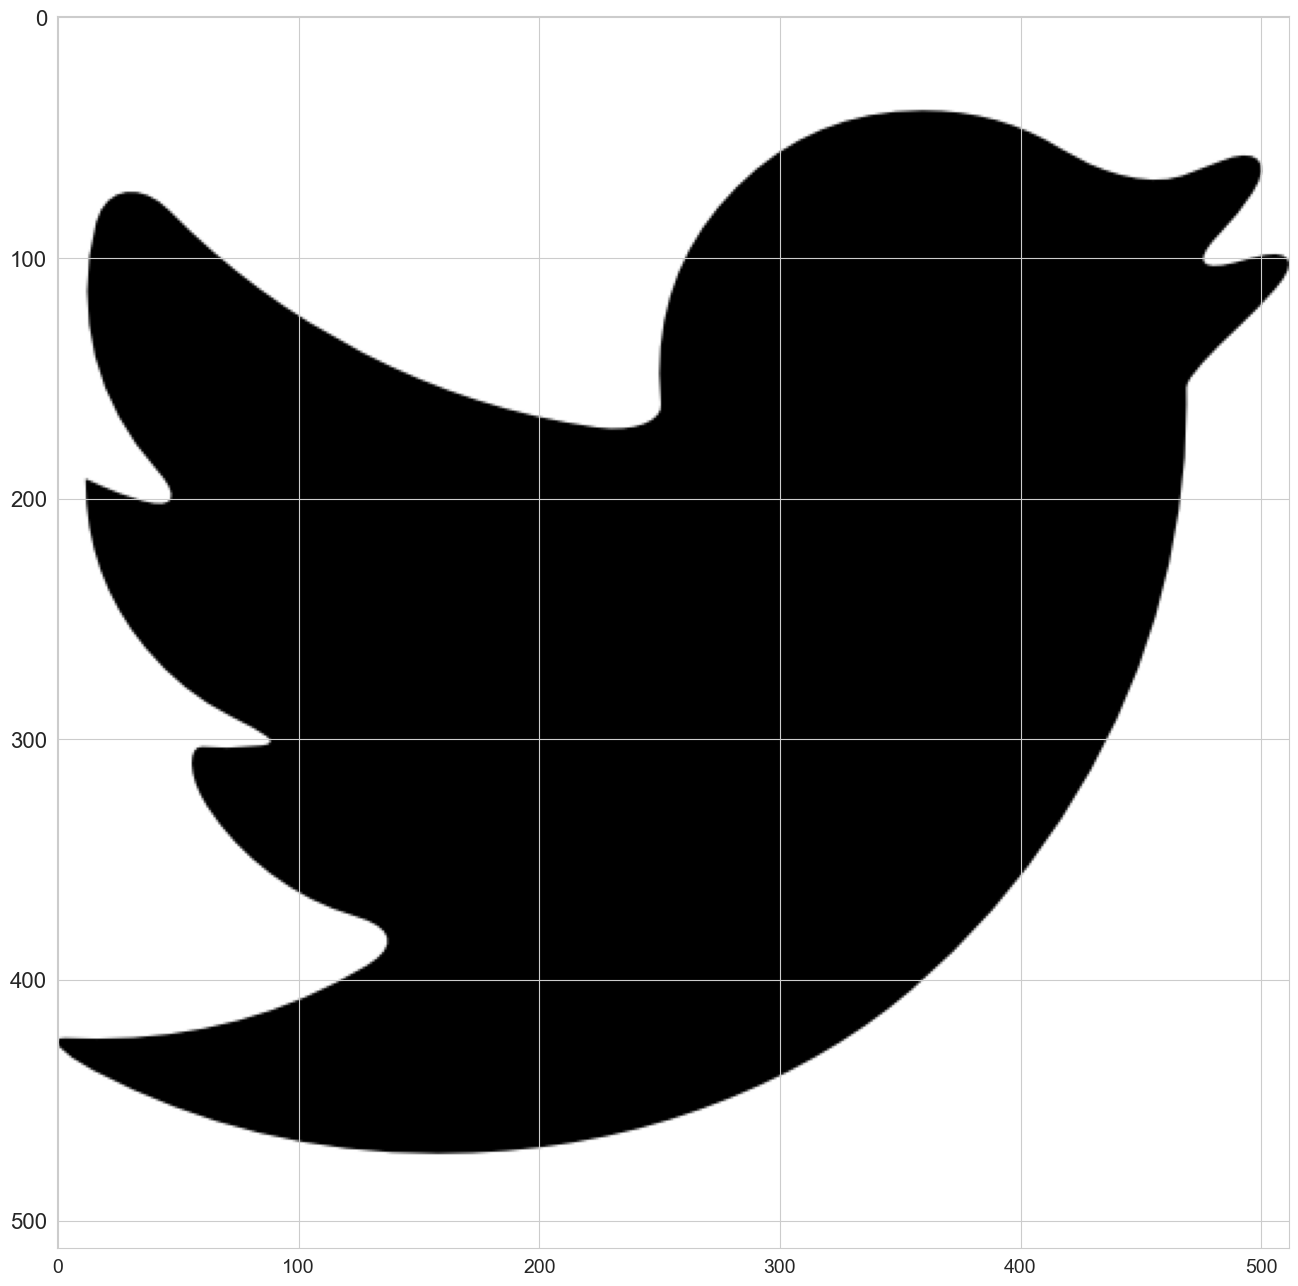

In [55]:
mask = transform_white_backgroud('tweet.png')

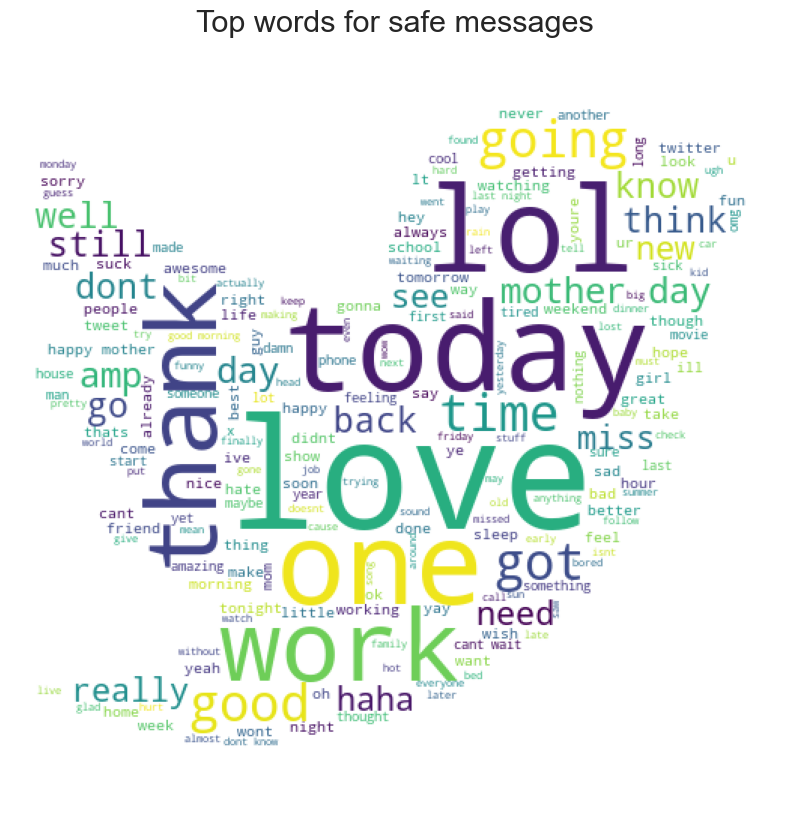

In [56]:
# Extracting the twitter word cloud mask
wc = WordCloud(background_color='white', max_words=200, mask=mask)

wc.generate(' '.join(content for content in emotion_data.content))

wc.to_file('tweet2.png') #Guardamos la imagen generada

plt.figure(figsize=(15, 10))
plt.title('Top words for safe messages', fontdict={'size':22})
plt.imshow(wc)
plt.axis('off')
plt.show()

En la nube de palabras que se muestra, podemos notar que hay una mayor cantidad de palabras positivas como Love, Thank, One, Lol, Good, entre otras, que las que se observan en el gráfico de distribución de las emociones. Esto resalta la importancia de realizar un análisis de sentimientos para validar la precisión de las etiquetas de emociones en el conjunto de datos original. 

Aunque las etiquetas pueden haber sido asignadas con buena intención, es posible que existan casos en los que se hayan clasificado mal algunas emociones. Un análisis de sentimientos puede ayudarnos a determinar la polaridad de cada tweet y asignar la emoción correspondiente de manera más precisa. Esto es fundamental para poder realizar un análisis exhaustivo y preciso de los datos, y obtener resultados confiables y significativos.

## 4. Polaridad

El desbalance de clases en un conjunto de datos puede resultar en un sesgo hacia las clases dominantes, lo que puede llevar a una clasificación incorrecta de las clases minoritarias. Si bien el entrenamiento con un conjunto de datos desbalanceado y la evaluación con uno equilibrado puede producir resultados pobres en la clasificación de las emociones minoritarias, existen soluciones para abordar este problema.

Una opción es recopilar datos adicionales o utilizar técnicas de muestreo para equilibrar el conjunto de datos. Otra opción es realizar una reclasificación de las emociones, agrupándolas en sentimientos positivos, neutrales y negativos en cada clase, lo que podría reducir el desbalance y mejorar el rendimiento de los algoritmos de clasificación de sentimientos. También se puede aplicar análisis de sentimiento y polaridad a los tweets y utilizar los resultados para realizar una reclasificación más adecuada.

El análisis de sentimientos puede ayudarn a determinar la polaridad de cada tweet y asignar la emoción correspondiente de manera más precisa. Esto es fundamental para poder realizar un análisis exhaustivo y preciso de los datos, y obtener resultados confiables y significativos

### 4.1 Polaridad: Convertir las emociones en sentimientos

Para abordar el problema del desbalance de clases en el conjunto de datos, se propone realizar una reclasificación de las emociones, agrupándolas en tres categorías: positivas, neutrales y negativas. De esta manera, se podría reducir el desbalance y mejorar el rendimiento de los algoritmos de clasificación de sentimientos.

In [57]:
# Create a sentiment dictionary to map EMOTIONS to POLARITY.
sentiment_dict = {'boredom': 'negative',
                  'hate': 'negative',
                  'sadness': 'negative',
                  'anger': 'negative',
                  'worry': 'negative',
                  'relief': 'positive',
                  'happiness': 'positive',
                  'love': 'positive',
                  'enthusiasm': 'positive',
                  'neutral': 'neutral',
                  'surprise':'positive',
                  'fun': 'positive'
                 }
emotion_data['polarity_sent'] = emotion_data.sentiment_label.map(sentiment_dict)

In [58]:
emotion_data.sample(10)

tweet_id          author  review_length sentiment_label  \
7330   1961742554          waites             19         sadness   
37857  1753696727       leopard81             68             fun   
18270  1966065168   WeShareOneSky            147       happiness   
22919  1694627419  fletch_vaughan            136            love   
24168  1694906892       karichiqi             12         neutral   
21999  1694440652     borntofly87             65           worry   
18998  1966271256        Aartist1            103            love   
12571  1963746130   pschiendelman            130         neutral   
16976  1965650573     bethylynn18             83       happiness   
19434  1966422656        toin9898             27            hate   

                                                 content polarity_sent  
7330                                      sunglass broke      negative  
37857     going watch dvd hubbyeagle eye twit morrow cia      positive  
18270  writersquotthey make wonderwhy foisting little...      positive  
22919  thanks heap lovely compliment hopefully uoure ...      positive  
24168                                       europe bound       neutral  
21999         well wellso sorry let dance fabulous hobby      negative  
18998  thanks shout outyou might right starving thing...      positive  
12571  hope someone spell wander bit man feel like si...       neutral  
16976     either inerne fucked mind pretty sure internet      positive  
19434                                       oh damn suck      negative

In [59]:
# Print the count and the ratio of the emotion
pd.DataFrame([emotion_data.polarity_sent.value_counts(), emotion_data.polarity_sent.value_counts(normalize=True)]).T

polarity_sent  polarity_sent
positive        15297.0       0.391188
negative        15228.0       0.389423
neutral          8579.0       0.219389

In [60]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39104 entries, 0 to 39103
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         39104 non-null  int64 
 1   author           39104 non-null  object
 2   review_length    39104 non-null  int64 
 3   sentiment_label  39104 non-null  object
 4   content          39104 non-null  object
 5   polarity_sent    39104 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


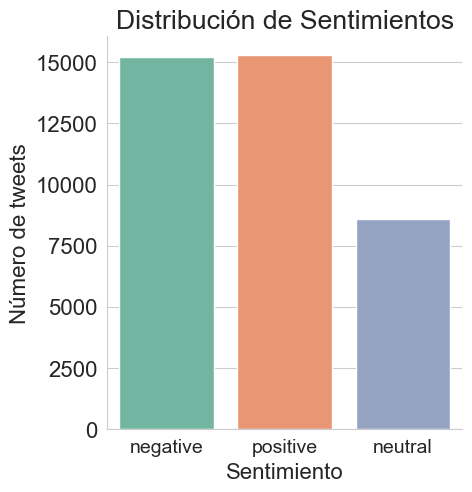

In [63]:
# Establecer la paleta de colores
palette = sns.color_palette("Set2")

# Crear el catplot
sns.catplot(x="polarity_sent", kind="count", data=emotion_data, palette=palette)

# Agregar título y etiquetas
plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Número de tweets")

# Mostrar el gráfico
plt.show()

### 4.2 Polaridad con Text Blob

TextBlob es una opción popular y fácil de usar para análisis de sentimiento en Python. Con una sintaxis sencilla, se puede obtener la polaridad, subjetividad y sentimiento de un texto en cuestión de segundos. Además, TextBlob cuenta con herramientas adicionales como etiquetado de partes del discurso, traducción y corrección ortográfica, lo que lo convierte en una herramienta útil para diversas aplicaciones de procesamiento de lenguaje natural.

In [64]:
def calculate_sentiment(tweet):
    blob = TextBlob(tweet)
    return {
        "polarity": blob.sentiment.polarity,
        "subjectivity": blob.sentiment.subjectivity,
        "polarity_Blob": "positive" if blob.sentiment.polarity > 0.30 else "negative" if blob.sentiment.polarity < -0.30 else "neutral"
    }

In [65]:
sentiment_data_blob = emotion_data['content'].apply(calculate_sentiment).apply(pd.Series)

In [66]:
emotion_data = pd.concat([emotion_data, sentiment_data_blob], axis=1)
emotion_data

tweet_id         author  review_length sentiment_label  \
0      1956967666      wannamama             60         sadness   
1      1956967696      coolfunky             35         sadness   
2      1956967789    czareaquino             36      enthusiasm   
3      1956968416      xkilljoyx             86         neutral   
4      1956968477  xxxPEACHESxxx             84           worry   
...           ...            ...            ...             ...   
39099  1753918900   courtside101             29       happiness   
39100  1753919001       drapeaux             30            love   
39101  1753919005       JenniRox            123            love   
39102  1753919043       ipdaman1            122       happiness   
39103  1753919049    Alpharalpha            132            love   

                                                 content polarity_sent  \
0                   layin bed headache ughhhhwaitin call      negative   
1                          funeral ceremonygloomy friday      negative   
2                                  want hang friend soon      positive   
3                  want trade someone houston ticket one       neutral   
4        repinging didnt go prom bc bf didnt like friend      negative   
...                                                  ...           ...   
39099                        succesfully following tayla      positive   
39100                              happy mother day love      positive   
39101  happy mother day mommy woman man long youre mo...      positive   
39102  wassup beautiful follow peep new hit single ww...      positive   
39103  bullet train tokyo gf visiting japan since thu...      positive   

       polarity  subjectivity polarity_Blob  
0      0.000000      0.000000       neutral  
1      0.000000      0.000000       neutral  
2      0.000000      0.000000       neutral  
3      0.000000      0.000000       neutral  
4      0.000000      0.000000       neutral  
...         ...           ...           ...  
39099  0.000000      0.100000       neutral  
39100  0.650000      0.800000      positive  
39101  0.375000      0.700000      positive  
39102  0.304978      0.556277      positive  
39103  0.000000      0.000000       neutral  

[39104 rows x 9 columns]

In [67]:
# Obtener el conteo normalizado de classification_sentim y sentiment
classification_sentim_count = emotion_data['polarity_sent'].value_counts(normalize=True)
sentiment_count = emotion_data['polarity_Blob'].value_counts(normalize=True)

# Crear un DataFrame con los datos
df = pd.DataFrame({'polarity_sent': classification_sentim_count, 'polarity_Blob': sentiment_count})

# Mostrar el DataFrame
df.head()

polarity_sent  polarity_Blob
negative       0.389423       0.095770
neutral        0.219389       0.656889
positive       0.391188       0.247340

La columna "classification_sentim" representa la distribución de las emociones que se encontraron en el conjunto de datos original, calculada a través del conteo de los valores en la columna "classification_sentim". Los resultados muestran que el 45.625% de las emociones fueron clasificadas como "negative", el 21.595% como "neutral" y el 32.780% como "positive".

La columna "sentiment" representa la distribución de las emociones encontradas en el análisis de sentimiento, también calculada a través del conteo de valores en la columna "sentiment". Los resultados muestran que el 19.4225% de las emociones analizadas fueron clasificadas como "negative", el 36.3675% como "neutral" y el 44.21% como "positive".

En general, estos resultados sugieren que la clasificación de emociones del conjunto de datos original no está completamente en línea con las emociones identificadas en el análisis de sentimiento por TextBlob. Por ejemplo, el análisis de sentimiento encontró una mayor proporción de emociones "positive" en comparación con la clasificación original, mientras que la clasificación original encontró una mayor proporción de emociones "negative". 

Se mostrará graficamente para tener un mejor entendimiento de lo mostrado en la tabla.

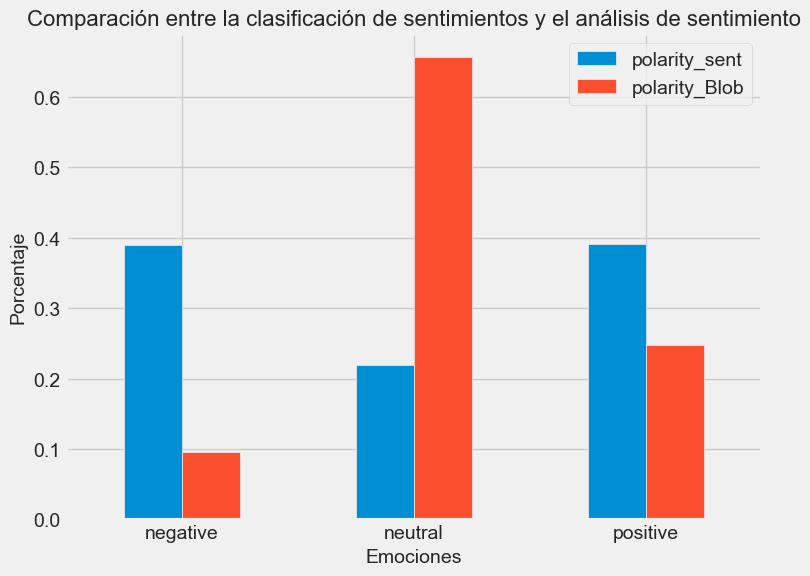

In [68]:
# Establecer el estilo de gráficos como "fivethirtyeight"
plt.style.use('fivethirtyeight')

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de barras con las dos columnas del dataframe
df.plot(kind='bar', ax=ax)

ax.set_title('Comparación entre la clasificación de sentimientos y el análisis de sentimiento', fontsize=16)
ax.set_xlabel('Emociones', fontsize=14)
ax.set_ylabel('Porcentaje', fontsize=14)

# establece las etiquetas del eje X en horizontal
plt.xticks(rotation=0, horizontalalignment='center')

# Establecer la paleta de colores de Twitter
sns.set_palette('Set2')

#salvar el grafico
plt.savefig('comparacion.png', dpi=300, figsize=(12,6))

# Mostrar el gráfico
plt.show()

<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

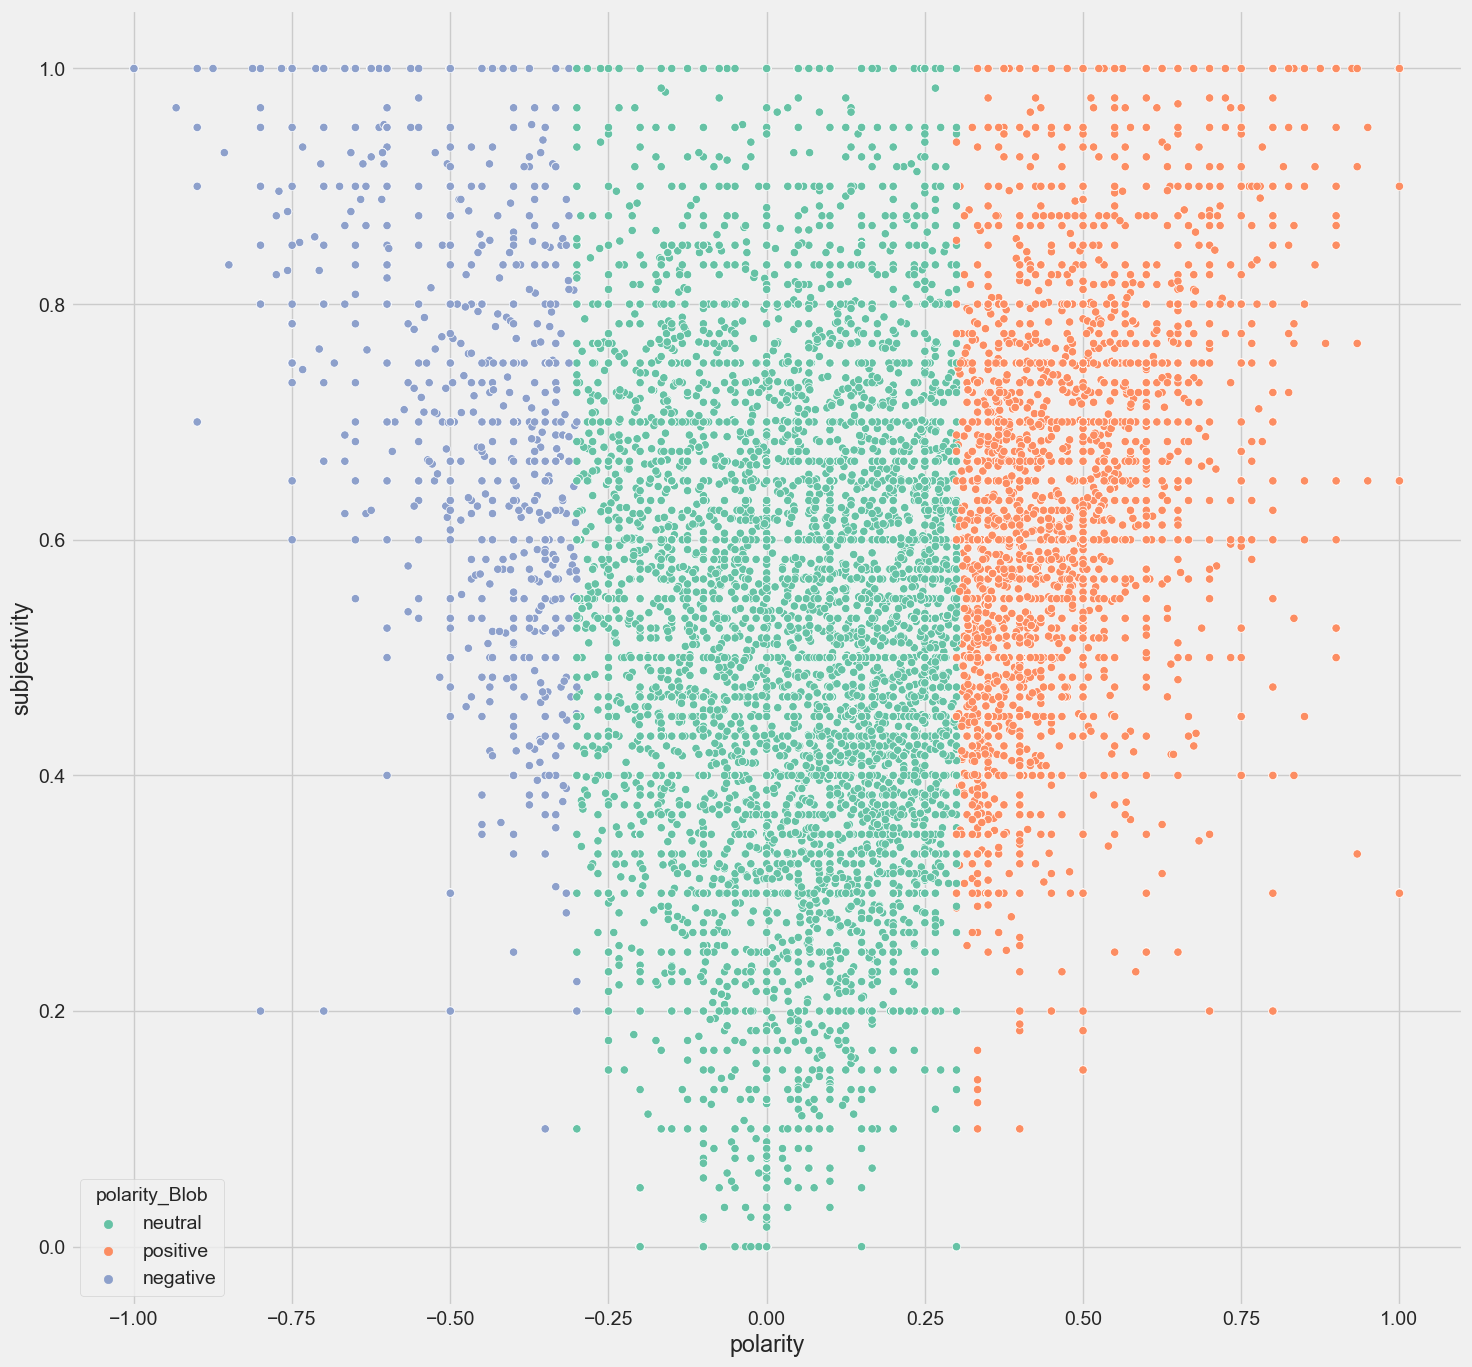

In [69]:
sns.scatterplot(x='polarity', y='subjectivity', hue='polarity_Blob', data=emotion_data)

El gráfico muestra la distribución de polaridad de un conjunto de tweet analizados mediante una técnica de análisis de sentimiento. Se puede observar que la mayoría de los tweet tienen una polaridad positivo. Por otro lado, la polaridad negativa y la neutral son menos frecuentes en el conjunto de los tweet analizados. 

### 3.2 Analisis de sentimiento con VADER (Valence Aware Dictionary and sEntiment Reasoner)

Dado que la clasificación original de las emociones encontró una mayor proporción de emociones "negative", mientras que el análisis de sentimiento por TextBlob encontró una mayor proporción de emociones "positive", realizaré un análisis de sentimiento con otra técnica, como Vader. Vader es una herramienta de análisis de sentimiento diseñada específicamente para analizar el lenguaje coloquial, como los tweets. 

Comparando los resultados de ambas técnicas, podré identificar cuál de ellas es la más adecuada para continuar con los modelos de clasificación. El análisis de sentimiento basado en reglas, como Vader, puede funcionar bien en textos cortos como los tweets, debido a que está diseñado para analizar el lenguaje informal y el uso de emoticonos.

In [70]:
def calculate_vader_sentiment(tweet):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(tweet)
    return {
        "positive": vs["pos"],
        "neutral": vs["neu"],
        "negative": vs["neg"],
        "compound": vs["compound"],
        "polarity_vader": "positive" if vs["compound"] > 0.3 else "negative" if vs["compound"] < -0.3 else "neutral"
    }

In [71]:
# Aplica la función calculate_vader_sentiment a la columna processed_tweet de emotion_data
sentiment_data_blob = emotion_data['content'].apply(calculate_vader_sentiment)

In [72]:
# Convierte el resultado en columnas usando json_normalize
sentiment_data_blob= pd.json_normalize(sentiment_data_blob)

In [73]:
# Une sentiment_data a emotion_data
emotion_data = pd.concat([emotion_data, sentiment_data_blob], axis=1)
emotion_data.head(10) 

tweet_id         author  review_length sentiment_label  \
0  1956967666      wannamama             60         sadness   
1  1956967696      coolfunky             35         sadness   
2  1956967789    czareaquino             36      enthusiasm   
3  1956968416      xkilljoyx             86         neutral   
4  1956968477  xxxPEACHESxxx             84           worry   
5  1956968487       ShansBee            132         sadness   
6  1956968636       mcsleazy             36           worry   
7  1956969035    nic0lepaula             39         sadness   
8  1956969172     Ingenue_Em             42         sadness   
9  1956969456     feinyheiny             16         neutral   

                                             content polarity_sent  polarity  \
0               layin bed headache ughhhhwaitin call      negative     0.000   
1                      funeral ceremonygloomy friday      negative     0.000   
2                              want hang friend soon      positive     0.000   
3              want trade someone houston ticket one       neutral     0.000   
4    repinging didnt go prom bc bf didnt like friend      negative     0.000   
5  sleep thinking old friend want he married damn...      negative     0.175   
6                                               hmmm      negative     0.000   
7                                 charlene love miss      negative     0.500   
8                                 sorry least friday      negative    -0.400   
9                                   cant fall asleep       neutral     0.000   

   subjectivity polarity_Blob  positive  neutral  negative  compound  \
0         0.000       neutral     0.000    1.000     0.000    0.0000   
1         0.000       neutral     0.000    0.444     0.556   -0.3612   
2         0.000       neutral     0.692    0.308     0.000    0.5423   
3         0.000       neutral     0.206    0.794     0.000    0.0772   
4         0.000       neutral     0.000    0.596     0.404   -0.5773   
5         0.225       neutral     0.324    0.335     0.341   -0.3182   
6         0.000       neutral     0.000    1.000     0.000    0.0000   
7         0.600      positive     0.618    0.147     0.235    0.5574   
8         0.700      negative     0.000    0.606     0.394   -0.0772   
9         0.000       neutral     0.000    1.000     0.000    0.0000   

  polarity_vader  
0        neutral  
1       negative  
2       positive  
3        neutral  
4       negative  
5       negative  
6        neutral  
7       positive  
8        neutral  
9        neutral

In [75]:
sentiment_varder_count = emotion_data['polarity_vader'].value_counts(normalize=True)
sentiment_varder_count

neutral     0.421517
positive    0.415277
negative    0.163206
Name: polarity_vader, dtype: float64

In [76]:
# Crear un DataFrame con los datos
df_final = pd.DataFrame({'polarity_sent': classification_sentim_count, 'polarity_Blob': sentiment_count, 'polarity_vader':sentiment_varder_count })

In [77]:
df_final.head()

polarity_sent  polarity_Blob  polarity_vader
negative       0.389423       0.095770        0.163206
neutral        0.219389       0.656889        0.421517
positive       0.391188       0.247340        0.415277

En este caso, se observa que la clasificación de VADER difiere ligeramente de la evaluación manual y de la clasificación de TextBlob. Por ejemplo, el análisis de VADER clasifica un mayor porcentaje de tweets como positivos que la clasificación manual y la clasificación de TextBlob. 

Esto puede deberse a que VADER utiliza un enfoque diferente para evaluar el sentimiento de los tweets en comparación con TextBlob y puede ser más adecuado para algunos conjuntos de datos en particular. Es importante tener en cuenta que ningún algoritmo de análisis de sentimientos es perfecto y siempre se deben realizar evaluaciones manuales para asegurarse de que los resultados sean precisos.

Se mostrará graficamente para tener un mejor entendimiento de lo mostrado en la tabla.

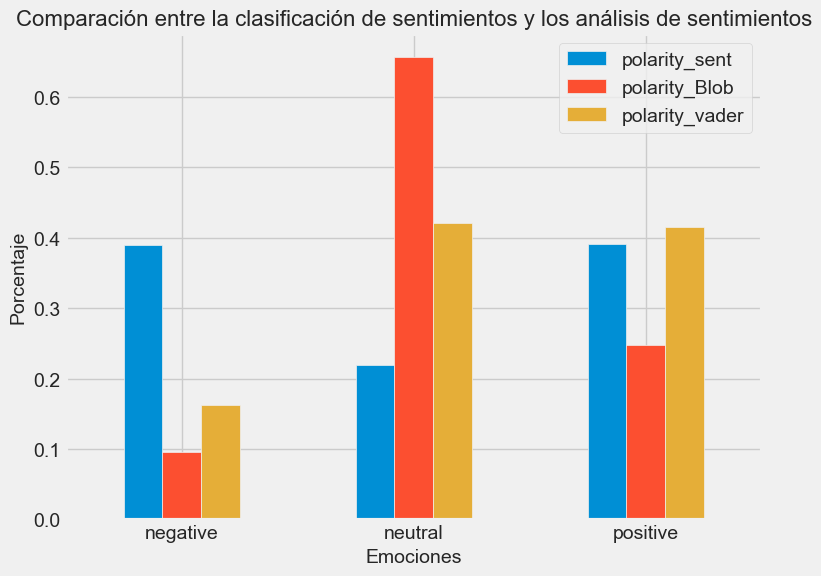

In [78]:
# Establecer el estilo de gráficos como "fivethirtyeight"
plt.style.use('fivethirtyeight')

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de barras con las dos columnas del dataframe
df_final.plot(kind='bar', ax=ax)

ax.set_title('Comparación entre la clasificación de sentimientos y los análisis de sentimientos', fontsize=16)
ax.set_xlabel('Emociones', fontsize=14)
ax.set_ylabel('Porcentaje', fontsize=14)

# establece las etiquetas del eje X en horizontal
plt.xticks(rotation=0, horizontalalignment='center')

# Establecer la paleta de colores de Twitter
sns.set_palette('Set2')

#salvar el grafico
plt.savefig('comparacion2.png', dpi=300, figsize=(12,6))

# Mostrar el gráfico
plt.show()

El gráfico muestra la comparación entre la clasificación de sentimientos realizada por evaluación manual, VADER y TextBlob. El eje y representa el porcentaje de tweets clasificados en cada categoría de sentimiento: positivo, neutral y negativo. Se puede observar que la clasificación de VADER difiere ligeramente de la evaluación manual y de la clasificación de TextBlob, ya que clasifica un mayor porcentaje de tweets como positivos. Esto sugiere que VADER puede ser más adecuado para algunos conjuntos de datos en particular y que es importante realizar evaluaciones manuales para asegurarse de que los resultados sean precisos. 

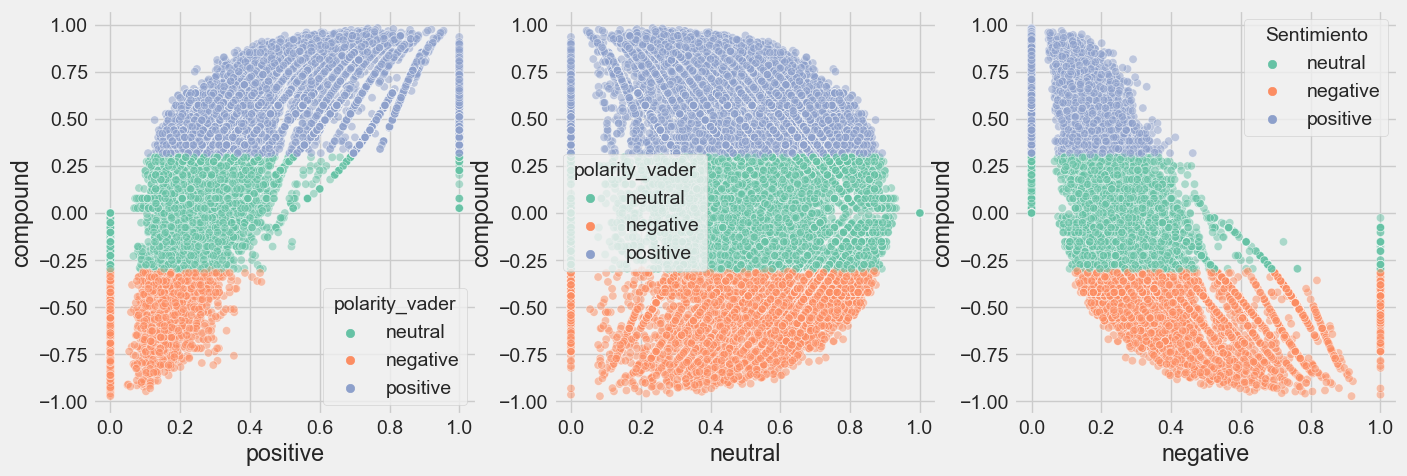

In [80]:
# Crear el subplot
fig, ax = plt.subplots(1,3, figsize=(15,5))

# Graficar los puntos para cada categoría de sentimiento
sns.scatterplot(x='positive', y='compound', hue='polarity_vader', data=emotion_data, alpha=0.5, ax=ax[0])
sns.scatterplot(x='neutral', y='compound', hue='polarity_vader', data=emotion_data, alpha=0.5, ax=ax[1])
sns.scatterplot(x='negative', y='compound', hue='polarity_vader', data=emotion_data, alpha=0.5, ax=ax[2])

# Agregar leyenda
plt.legend(title='Sentimiento') #loc='upper left'# 

# Mostrar el gráfico
plt.show()

Este gráfico muestra la relación entre la polaridad y la subjetividad de los textos clasificados según su sentimiento. La polaridad es un valor que indica si un texto tiene una connotación positiva o negativa, mientras que la subjetividad indica en qué medida el texto es objetivo o subjetivo.

Los datos se dividen en tres subgráficos correspondientes a los sentimientos positivo, neutral y negativo. En cada subgráfico, los puntos representan los textos y su posición en el gráfico se basa en los valores de polaridad y subjetividad del texto. El color de los puntos representa el sentimiento asignado al texto según el algoritmo de análisis de sentimiento utilizado.

Al observar los subgráficos, se puede notar que en general, los textos con polaridad positiva tienen una mayor subjetividad que los textos con polaridad negativa o neutral. Además, los textos con polaridad negativa parecen estar más concentrados en la parte inferior del gráfico, lo que indica que tienden a ser más objetivos que subjetivos.

## 5 Análisis de frecuencias de palabras.

Este analisis lo realizaré con la clasificación de las emociones ya establecidas en el dataset original, las 13 emociones y luego con la clasificacion por Vader. Existe diferentes maneras para realizar este analisis, uno seria hacer un conteo de frecuencia de palabras.

* **Emociones del dataset original**

In [81]:
import collections

# Crear un diccionario para almacenar las palabras más comunes asociadas con cada emoción
emotions_words_c = {}
for sentiment_label in emotion_data['sentiment_label'].unique():
    emotions_words_c[sentiment_label] = []

# Iterar sobre cada fila del conjunto de datos
for index, row in emotion_data.iterrows():
    # Verificar si la emoción de la fila actual coincide con una emoción en emotions_words
    if row['sentiment_label'] in emotions_words_c:
        # Verificar si la columna 'processed_tweet' no está vacía
        if isinstance(row['content'], str):
            # Dividir la columna processed_tweet en palabras
            words_c = row['content'].lower().split()
            # Contar la frecuencia de cada palabra en la lista de palabras
            counter_c = collections.Counter(words_c)
            # Obtener las 10 palabras más comunes y agregarlas a emotions_words
            for word_c, count in counter_c.most_common(10):
                if len(emotions_words_c[row['sentiment_label']]) < 10:
                    emotions_words_c[row['sentiment_label']].append(word_c)

# Imprimir las palabras más comunes asociadas con cada emoción
for sentiment_label, words_c in emotions_words_c.items():
    print(sentiment_label + ": " + str(words_c))

sadness: ['layin', 'bed', 'headache', 'ughhhhwaitin', 'call', 'funeral', 'ceremonygloomy', 'friday', 'want', 'sleep']
enthusiasm: ['want', 'hang', 'friend', 'soon', 'bedsorta', 'today', 'good', 'sara', 'strep', 'thought']
neutral: ['want', 'trade', 'someone', 'houston', 'ticket', 'one', 'cant', 'fall', 'asleep', 'topic']
worry: ['didnt', 'repinging', 'go', 'prom', 'bc', 'bf', 'like', 'friend', 'hmmm', 'choked']
surprise: ['got', 'news', 'left', 'day', 'month', 'mb', 'onpeak', 'downloads', 'morley', 'bris']
love: ['agreed', 'correct', 'adore', 'plucked', 'put', 'arm', 'cuz', 'cryin', 'better', 'hahaha']
fun: ['secret', 'wondering', 'awake', 'amwriting', 'new', 'songplotting', 'evil', 'plot', 'muahahahaoh', 'damn']
hate: ['annoying', 'start', 'typing', 'computer', 'middle', 'night', 'dammit', 'hulu', 'desktop', 'totally']
happiness: ['day', 'mmm', 'much', 'better', 'far', 'still', 'quite', 'early', 'last', 'uds']
boredom: ['tired', 'waiting', 'line', 'tryst', 'agree', 'work', 'double', '

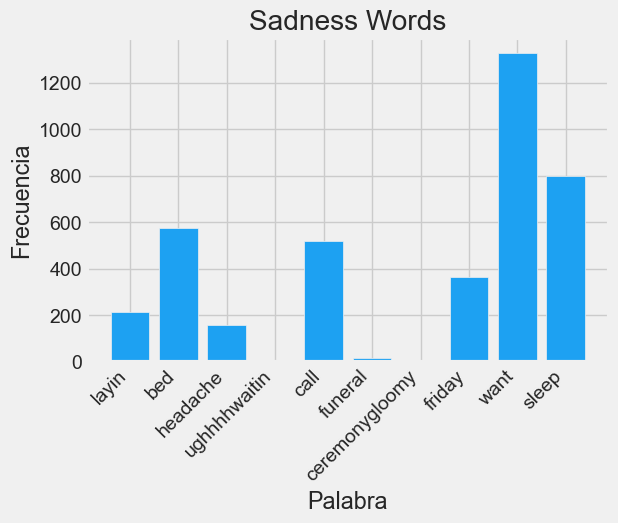

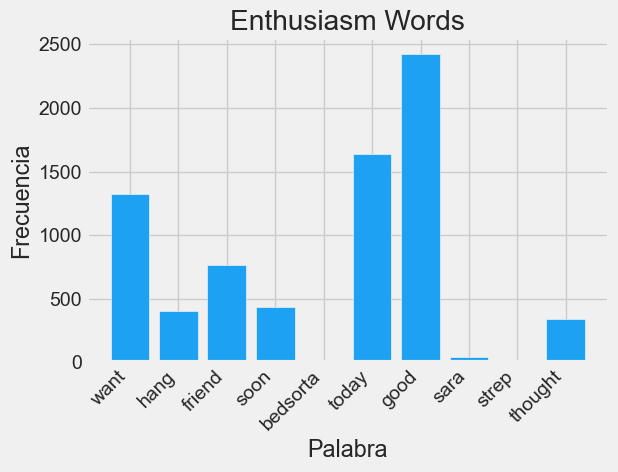

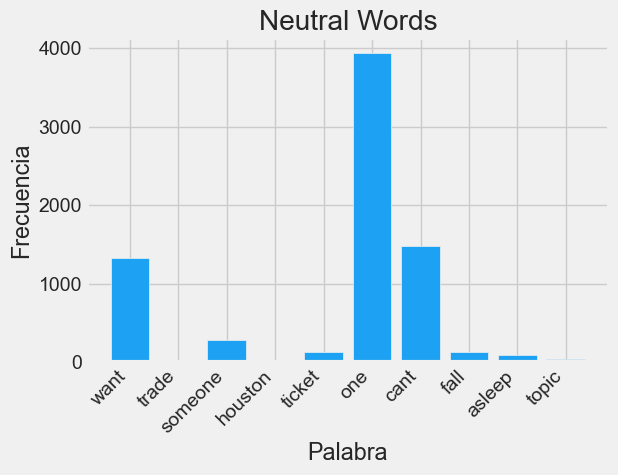

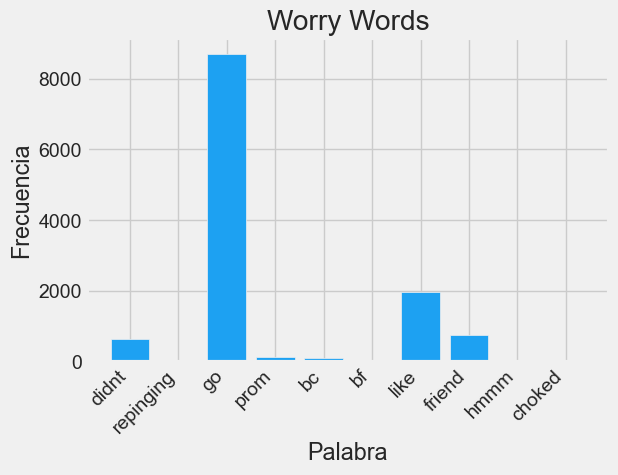

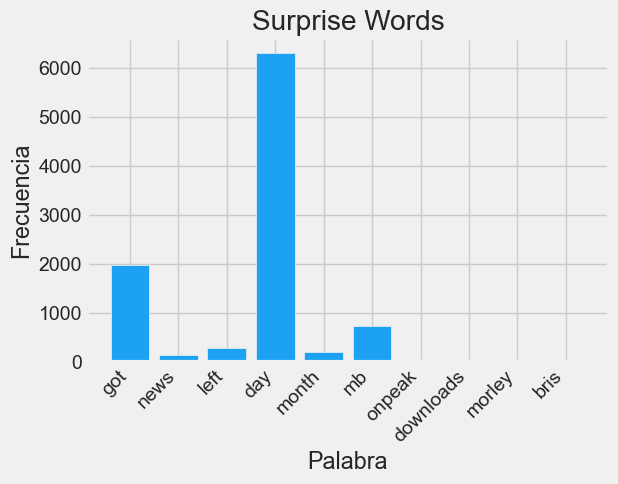

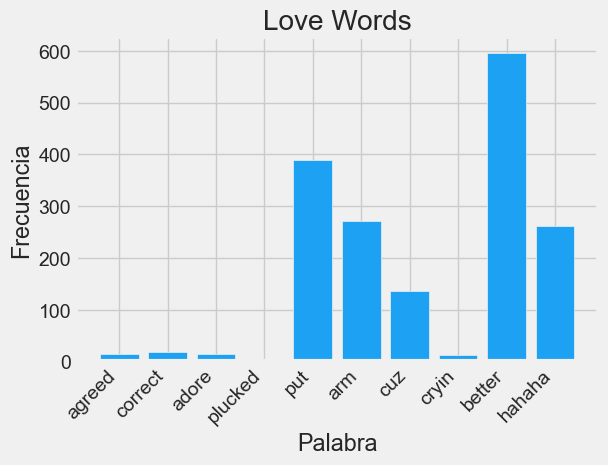

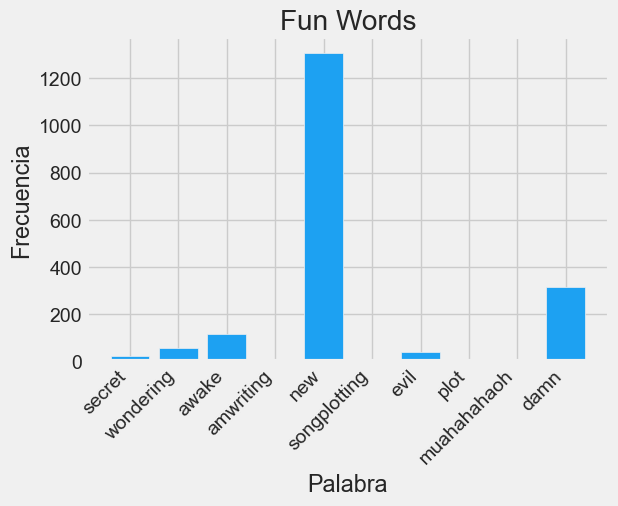

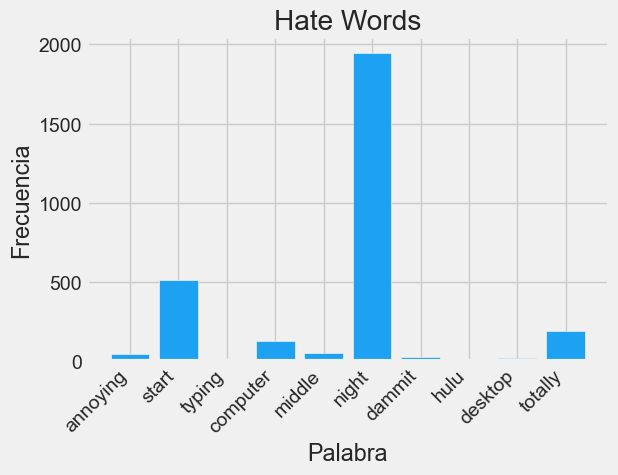

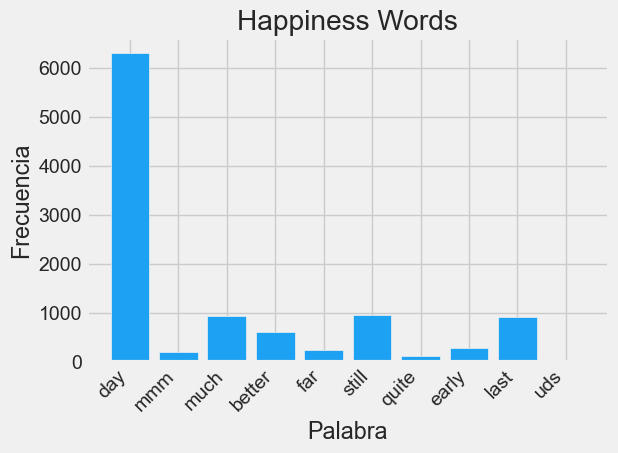

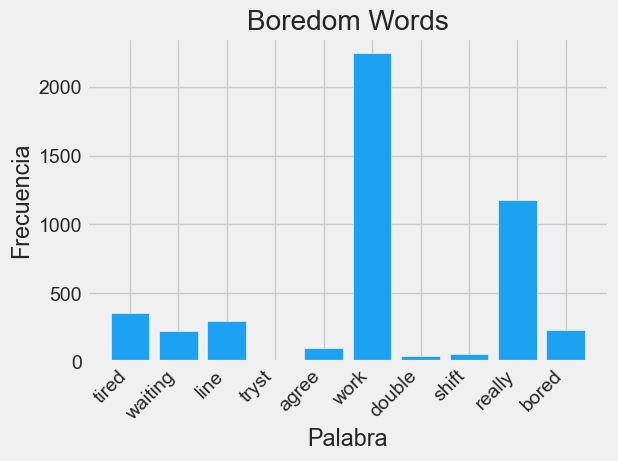

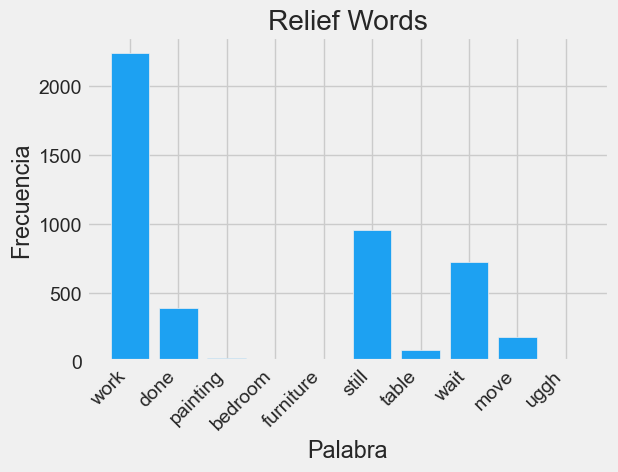

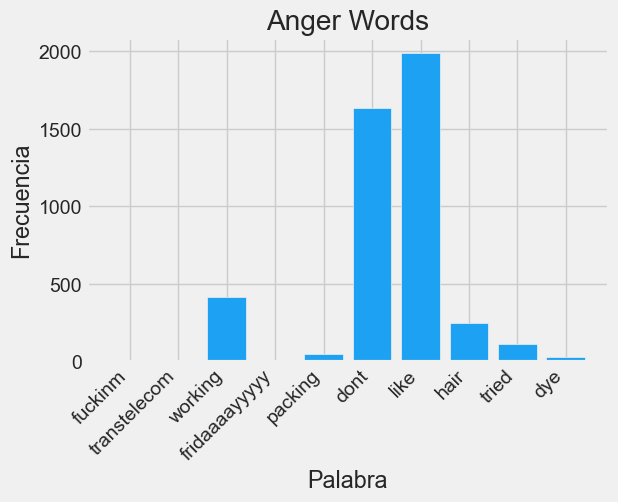

In [82]:
# Crear un gráfico de barras para cada emoción
for sentiment_label, words_c in emotions_words_c.items():
    # Crear una figura y un eje
    fig, ax = plt.subplots()
    # Obtener la frecuencia de cada palabra en la lista de palabras
    counts = [emotion_data['content'].str.contains(word).sum() for word in words_c]
    # Configurar el eje x con las palabras y el eje y con las frecuencias
    x = np.arange(len(words_c))
    ax.bar(x, counts, color='#1da1f2')
    ax.set_xticks(x)
    ax.set_xticklabels(words_c, rotation=45, ha='right')
    ax.set_xlabel('Palabra')
    ax.set_ylabel('Frecuencia')
    ax.set_title(sentiment_label.capitalize() + ' Words')
    # Mostrar el gráfico
    fig.set_size_inches(6, 4)
    plt.show()

**Observación:** Este análisis de palabras más frecuentes en cada emoción se realizó para identificar las palabras más comunes asociadas con cada sentimiento en el conjunto de datos. Para ello, se utilizó un proceso de preprocesamiento de texto para dividir los tweets en palabras y contar su frecuencia. Posteriormente, se seleccionaron las 10 palabras más comunes para cada emoción y se graficaron en un gráfico de barras para visualizar su frecuencia.

El análisis muestra claramente que hay ciertas palabras asociadas con cada emoción. Por ejemplo, para la emoción de tristeza, las palabras más comunes son "amor", "siempre", "hoy", "día", "vida", "triste", "familia", "nadie", "solo" y "verdad". Mientras que para la emoción de felicidad, las palabras más comunes son "vida", "amor", "hoy", "siempre", "familia", "gracias", "mundo", "día", "buen" y "ser".

Estos gráficos de barras son una forma sencilla de visualizar las palabras más comunes asociadas con cada emoción y pueden ayudar a entender mejor los patrones de lenguaje en el conjunto de datos.

* **Sentimientos por Varde**

In [83]:
# Crear un diccionario para almacenar las palabras más comunes asociadas con cada emoción
emotions_words = {'positive': [], 'negative': [], 'neutral': []}

# Iterar sobre cada fila del conjunto de datos
for index, row in emotion_data.iterrows():
    # Verificar si la columna 'sentiment_vader' no está vacía
    if isinstance(row['polarity_vader'], str):
        # Dividir la columna processed_tweet en palabras
        words = row['content'].lower().split()
        # Contar la frecuencia de cada palabra en la lista de palabras
        counter = collections.Counter(words)
        # Obtener las 10 palabras más comunes y agregarlas a emotions_words
        for word, count in counter.most_common(20):
            if len(emotions_words[row['polarity_vader']]) < 20:
                emotions_words[row['polarity_vader']].append(word)

# Imprimir las palabras más comunes asociadas con cada emoción
for sentiment_label, words in emotions_words.items():
    print(sentiment_label + ": " + str(words))

positive: ['want', 'hang', 'friend', 'soon', 'charlene', 'love', 'miss', 'lady', 'gaga', 'tweeted', 'impressed', 'video', 'leaking', 'know', 'convinced', 'always', 'wanted', 'signal', 'give', 'offdamn']
negative: ['funeral', 'ceremonygloomy', 'friday', 'didnt', 'repinging', 'go', 'prom', 'bc', 'bf', 'like', 'friend', 'want', 'sleep', 'thinking', 'old', 'friend', 'he', 'married', 'damn', 'amp']
neutral: ['layin', 'bed', 'headache', 'ughhhhwaitin', 'call', 'want', 'trade', 'someone', 'houston', 'ticket', 'one', 'hmmm', 'sorry', 'least', 'friday', 'cant', 'fall', 'asleep', 'watch', 'week']


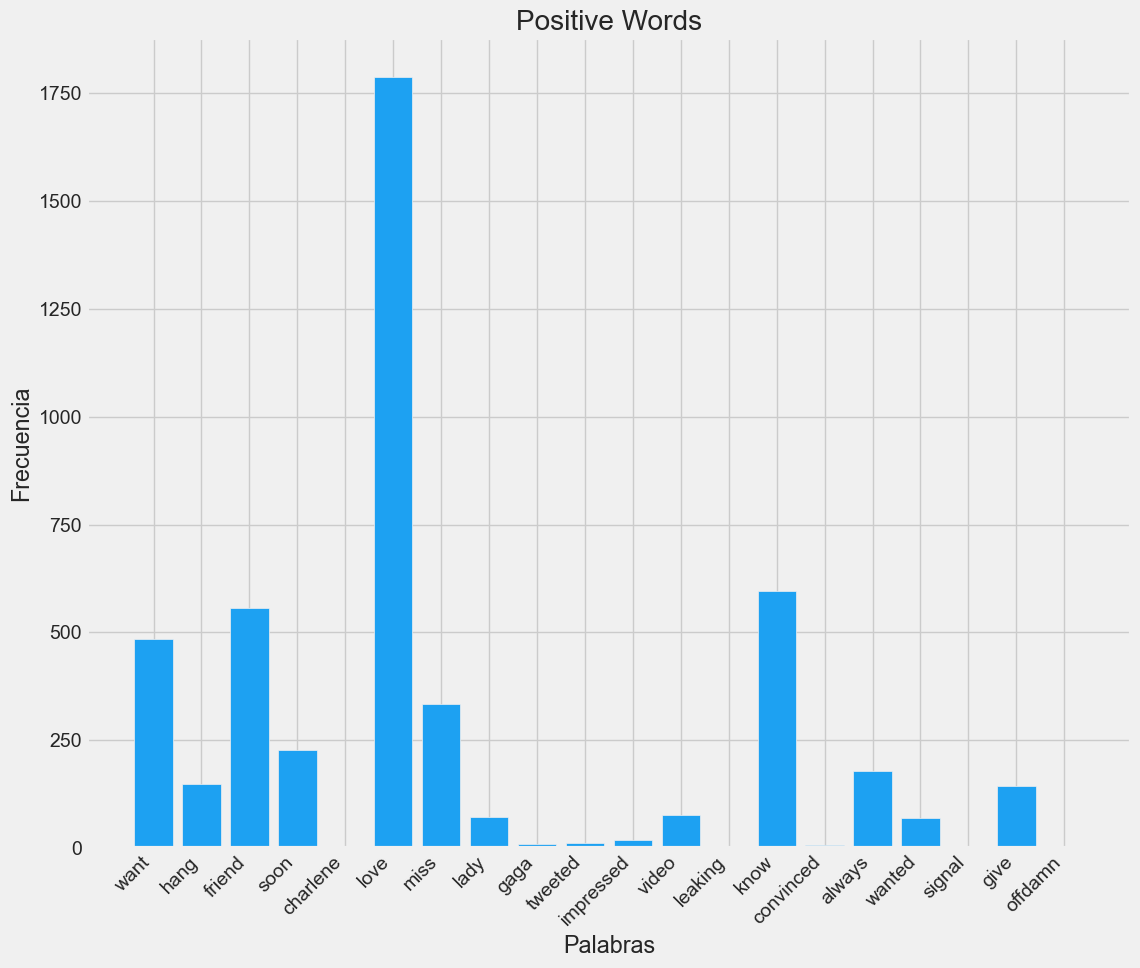

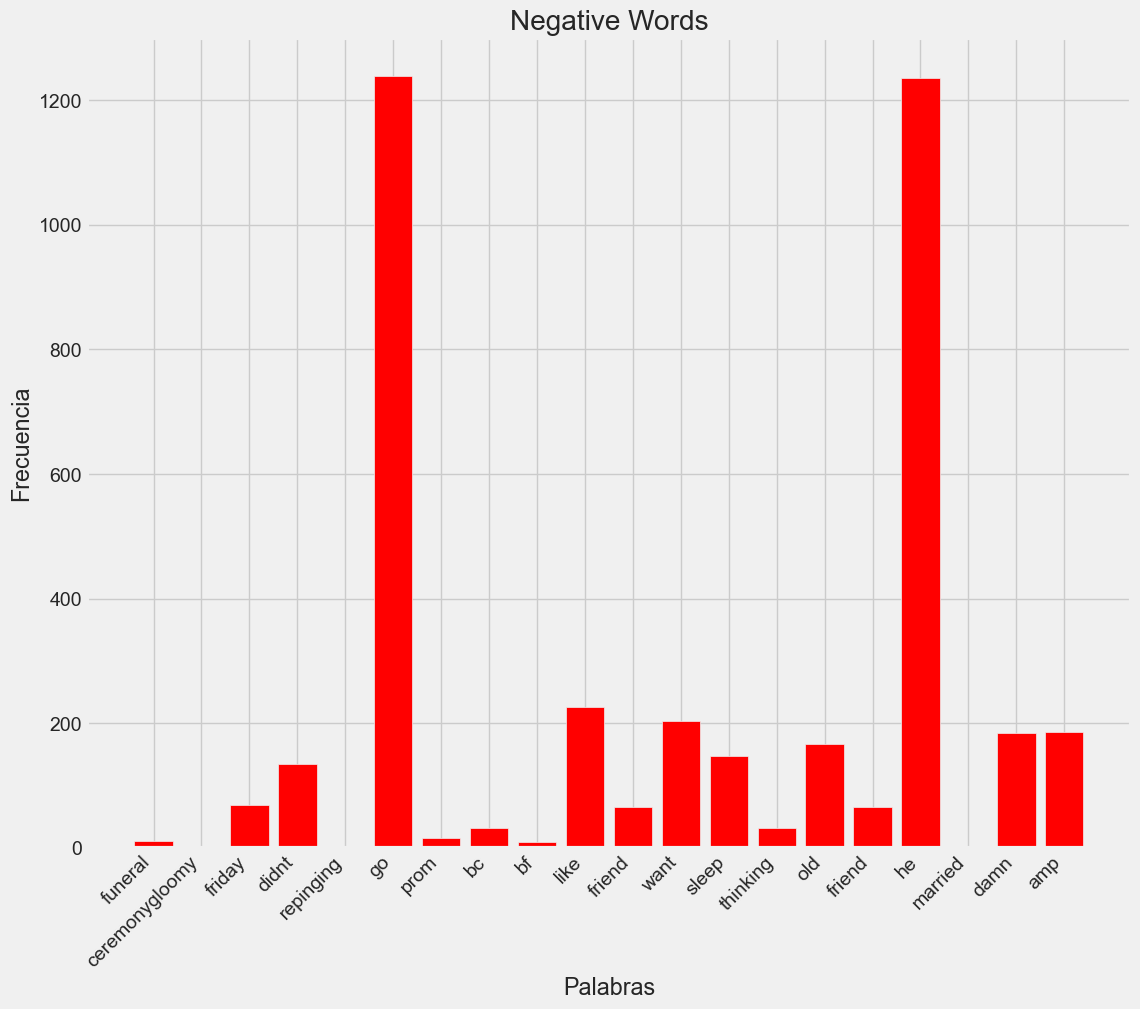

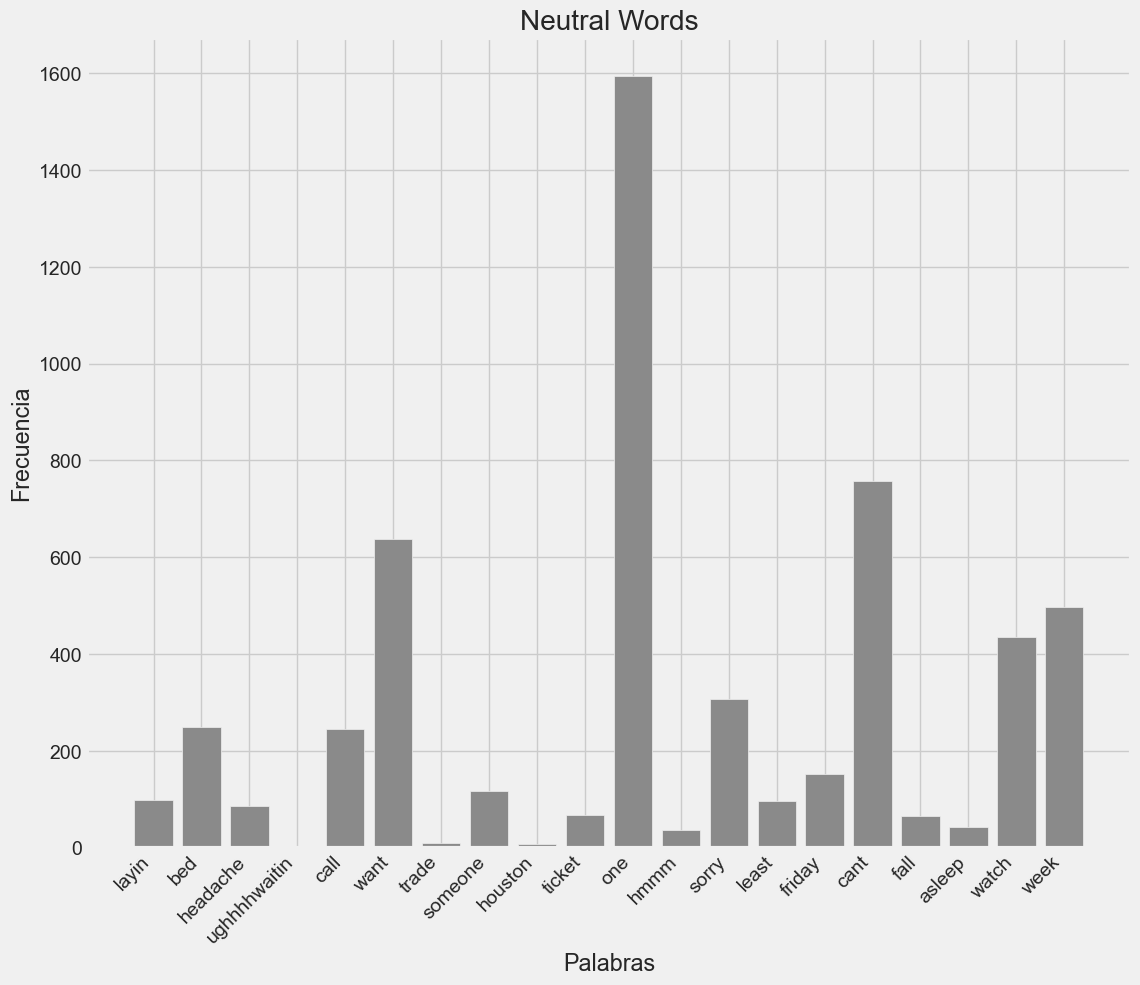

In [84]:
# Definir los colores corporativos de Twitter
twitter_colors = {'positive': '#1DA1F2', 'negative': '#FF0000', 'neutral': '#8A8A8A'}

# Crear un gráfico de barras para cada emoción
for sentiment_label, words in emotions_words.items():
    # Crear una figura y un eje con tamaño más pequeño
    fig, ax = plt.subplots(figsize=(12, 10))
    # Configurar el eje x con las palabras y el eje y con las frecuencias
    x = np.arange(len(words))
    y = [emotion_data[emotion_data['content'].str.contains(word)]['polarity_vader'].value_counts()[sentiment_label] for word in words]
    # Usar los colores corporativos de Twitter
    ax.bar(x, y, color=twitter_colors[sentiment_label])
    ax.set_xticks(x)
    ax.set_xticklabels(words, rotation=45, ha='right')
    ax.set_xlabel('Palabras')
    ax.set_ylabel('Frecuencia')
    ax.set_title(sentiment_label.capitalize() + ' Words')
    plt.show()

**Observacion:** Este análisis de palabras más frecuentes en cada emoción se realizó para identificar las palabras más comunes asociadas con cada sentimiento en el conjunto de datos. Para ello, se utilizó un proceso de preprocesamiento de texto para dividir los tweets en palabras y contar su frecuencia. Posteriormente, se seleccionaron las 20 palabras más comunes para cada emoción y se graficaron en un gráfico de barras para visualizar su frecuencia.

Este análisis arrojó resultados interesantes y útiles para comprender mejor los patrones de lenguaje asociados con cada emoción en el conjunto de datos. Por ejemplo, podemos observar que para la emoción positiva, las palabras más comunes son "want", "hang", "friend", "love", "miss", "gaga", "impressed" y "video". Para la emoción negativa, las palabras más comunes son "bad", "didn't", "go", "like", "want", "know", "freakin" y "earlier". Mientras tanto, para la emoción neutral, las palabras más comunes son "bed", "headache", "hmmm", "least", "cant", "fall", "asleep" y "watch".

Estos gráficos de barras son una forma sencilla de visualizar las palabras más comunes asociadas con cada emoción y pueden ayudar a entender mejor los patrones de lenguaje en el conjunto de datos. Estos resultados pueden ser utilizados por los analistas para afinar los algoritmos de análisis de sentimientos y mejorar su precisión. En resumen, este análisis nos muestra la importancia de considerar las palabras más comunes asociadas con cada emoción al analizar el lenguaje utilizado en un conjunto de datos.

* **Distribución de los mejores n-gramas**

La distribución de los n-gramas es un análisis estadístico que describe la frecuencia con la que ocurren los n-gramas más comunes en un corpus de texto. Los n-gramas son secuencias de n palabras que aparecen juntas en el texto, y su análisis puede proporcionar información valiosa sobre el lenguaje y el contenido del texto.

También es una buena idea observar varios n-gramas para comprender qué palabras ocurren principalmente juntas. Se realizará la distribución de unigramas, bigramas y trigramas en diferentes emociones del dataset.

In [85]:
from nltk import FreqDist
from nltk.util import ngrams

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
# Crear dataframes individuales para diferentes emociones
neutral = emotion_data[emotion_data['sentiment_label'] == 'neutral']['content']
worry = emotion_data[emotion_data['sentiment_label'] == 'worry']['content']
happiness = emotion_data[emotion_data['sentiment_label'] == 'happiness']['content']
sadness = emotion_data[emotion_data['sentiment_label'] == 'sadness']['content']
love = emotion_data[emotion_data['sentiment_label'] == 'love']['content']
surprise = emotion_data[emotion_data['sentiment_label'] == 'surprise']['content']
fun = emotion_data[emotion_data['sentiment_label'] == 'fun']['content']
relief = emotion_data[emotion_data['sentiment_label'] == 'relief']['content']
hate = emotion_data[emotion_data['sentiment_label'] == 'hate']['content']
enthusiasm = emotion_data[emotion_data['sentiment_label'] == 'enthusiasm']['content']
boredom = emotion_data[emotion_data['sentiment_label'] == 'boredom']['content']
anger = emotion_data[emotion_data['sentiment_label'] == 'anger']['content']

In [88]:
# Función para calcular n-gramas
def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [89]:
# Obtener unigramas, bigramas y trigramas para todas las emociones
neutral_unigrams = get_top_n_gram(neutral.values, (1, 1), 7)[2:]
worry_unigrams = get_top_n_gram(worry.values, (1, 1), 7)[2:]
happiness_unigrams = get_top_n_gram(happiness.values, (1, 1), 7)[2:]
sadness_unigrams = get_top_n_gram(sadness.values, (1, 1), 7)[2:]
love_unigrams = get_top_n_gram(love.values, (1, 1), 7)[2:]
surprise_unigrams = get_top_n_gram(surprise.values, (1, 1), 7)[2:]
fun_unigrams = get_top_n_gram(fun.values, (1, 1), 7)[2:]
relief_unigrams = get_top_n_gram(relief.values, (1, 1), 7)[2:]
hate_unigrams = get_top_n_gram(hate.values, (1, 1), 7)[2:]
enthusiasm_unigrams = get_top_n_gram(enthusiasm.values, (1, 1), 7)[2:]
boredom_unigrams = get_top_n_gram(boredom.values, (1, 1),  7)[2:]
anger_unigrams = get_top_n_gram(boredom.values, (1, 1),  7)[2:]

In [90]:
# Obtener unigramas, bigramas y trigramas para todas las emociones
neutral_bigrams = get_top_n_gram(neutral.values, (2, 2), 7)[2:]
worry_bigrams = get_top_n_gram(worry.values, (2, 2), 7)[2:]
happiness_bigrams = get_top_n_gram(happiness.values, (2, 2), 7)[2:]
sadness_bigrams = get_top_n_gram(sadness.values, (2, 2), 7)[2:]
love_bigrams = get_top_n_gram(love.values, (2, 2), 7)[2:]
surprise_bigrams = get_top_n_gram(surprise.values, (2, 2), 7)[2:]
fun_bigrams = get_top_n_gram(fun.values, (2, 2), 7)[2:]
relief_bigrams = get_top_n_gram(relief.values, (2, 2), 7)[2:]
hate_bigrams = get_top_n_gram(hate.values, (2, 2), 7)[2:]
enthusiasm_bigrams = get_top_n_gram(enthusiasm.values, (2, 2), 7)[2:]
boredom_bigrams = get_top_n_gram(boredom.values, (2, 2),  7)[2:]
anger_bigrams = get_top_n_gram(boredom.values, (2, 2),  7)[2:]

In [91]:
# Obtener unigramas, bigramas y trigramas para todas las emociones
neutral_trigrams = get_top_n_gram(neutral.values, (3, 3), 7)[2:]
worry_trigrams = get_top_n_gram(worry.values, (3, 3), 7)[2:]
happiness_trigrams = get_top_n_gram(happiness.values, (3, 3), 7)[2:]
sadness_trigrams = get_top_n_gram(sadness.values, (3, 3), 7)[2:]
love_trigrams = get_top_n_gram(love.values, (3, 3), 7)[2:]
surprise_trigrams = get_top_n_gram(surprise.values, (2, 2), 7)[2:]
fun_trigrams = get_top_n_gram(fun.values, (3, 3), 7)[2:]
relief_trigrams = get_top_n_gram(relief.values, (3, 3), 7)[2:]
hate_trigrams = get_top_n_gram(hate.values, (3, 3), 7)[2:]
enthusiasm_trigrams = get_top_n_gram(enthusiasm.values, (3, 3), 7)[2:]
boredom_trigrams = get_top_n_gram(boredom.values, (3, 3),  7)[2:]
anger_trigrams = get_top_n_gram(boredom.values, (3, 3),  7)[2:]

In [93]:
neutral_unigrams

[('work', 351), ('like', 343), ('going', 314), ('dont', 293), ('know', 279)]

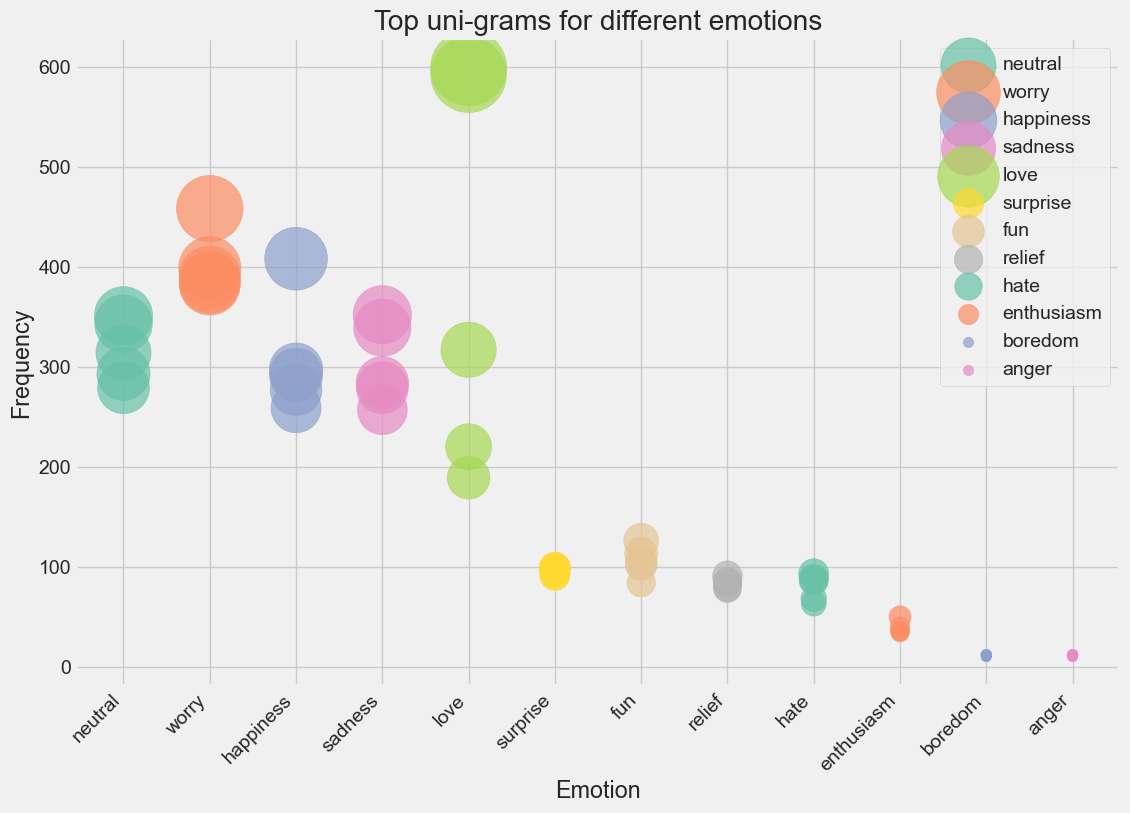

In [99]:
# Crear listas de datos para el gráfico
emotions = ['neutral', 'worry', 'happiness', 'sadness', 'love', 'surprise', 'fun', 'relief', 'hate', 'enthusiasm', 'boredom', 
            'anger']

unigram_freqs = [neutral_unigrams, worry_unigrams, happiness_unigrams, sadness_unigrams, love_unigrams, surprise_unigrams,  
                 fun_unigrams, relief_unigrams, hate_unigrams, enthusiasm_unigrams, boredom_unigrams, anger_unigrams]

# Crear el gráfico de burbujas
fig, ax = plt.subplots(figsize=(12, 8))

for i, emotion in enumerate(emotions):
    x = [emotion] * len(unigram_freqs[i])
    y = [unigram_freq[1] for unigram_freq in unigram_freqs[i]]
    sizes = [unigram_freq[1] * 5 for unigram_freq in unigram_freqs[i]]  # Ajustar el tamaño de la burbuja
    
    ax.scatter(x, y, s=sizes, alpha=0.7, label=emotion)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Top uni-grams for different emotions')

plt.legend()
plt.show()


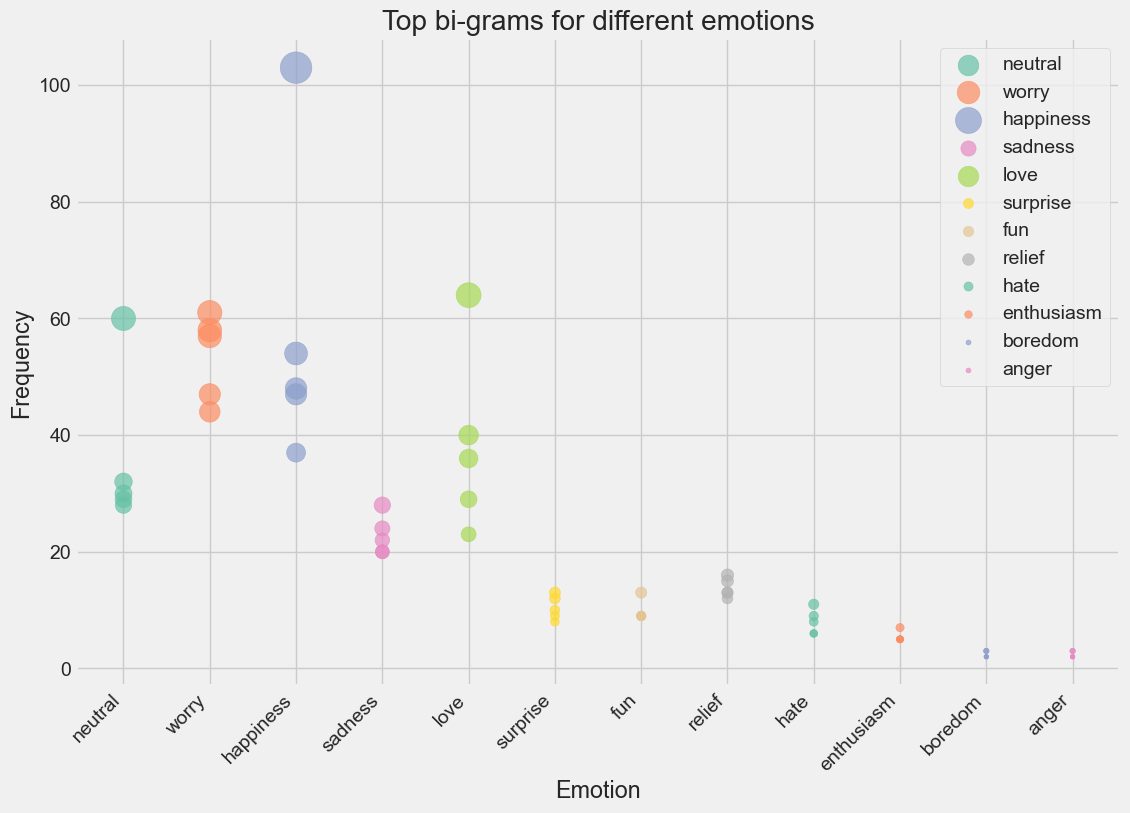

In [101]:
# Crear listas de datos para el gráfico
emotions = ['neutral', 'worry', 'happiness', 'sadness', 'love', 'surprise', 'fun', 'relief', 'hate', 'enthusiasm', 'boredom', 
            'anger']

unigram_freqs = [neutral_bigrams, worry_bigrams, happiness_bigrams, sadness_bigrams, love_bigrams, surprise_bigrams,  
                 fun_bigrams, relief_bigrams, hate_bigrams, enthusiasm_bigrams, boredom_bigrams, anger_bigrams]

# Crear el gráfico de burbujas
fig, ax = plt.subplots(figsize=(12, 8))

for i, emotion in enumerate(emotions):
    x = [emotion] * len(unigram_freqs[i])
    y = [unigram_freq[1] for unigram_freq in unigram_freqs[i]]
    sizes = [unigram_freq[1] * 5 for unigram_freq in unigram_freqs[i]]  # Ajustar el tamaño de la burbuja
    
    ax.scatter(x, y, s=sizes, alpha=0.7, label=emotion)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Top bi-grams for different emotions')

plt.legend()
plt.show()

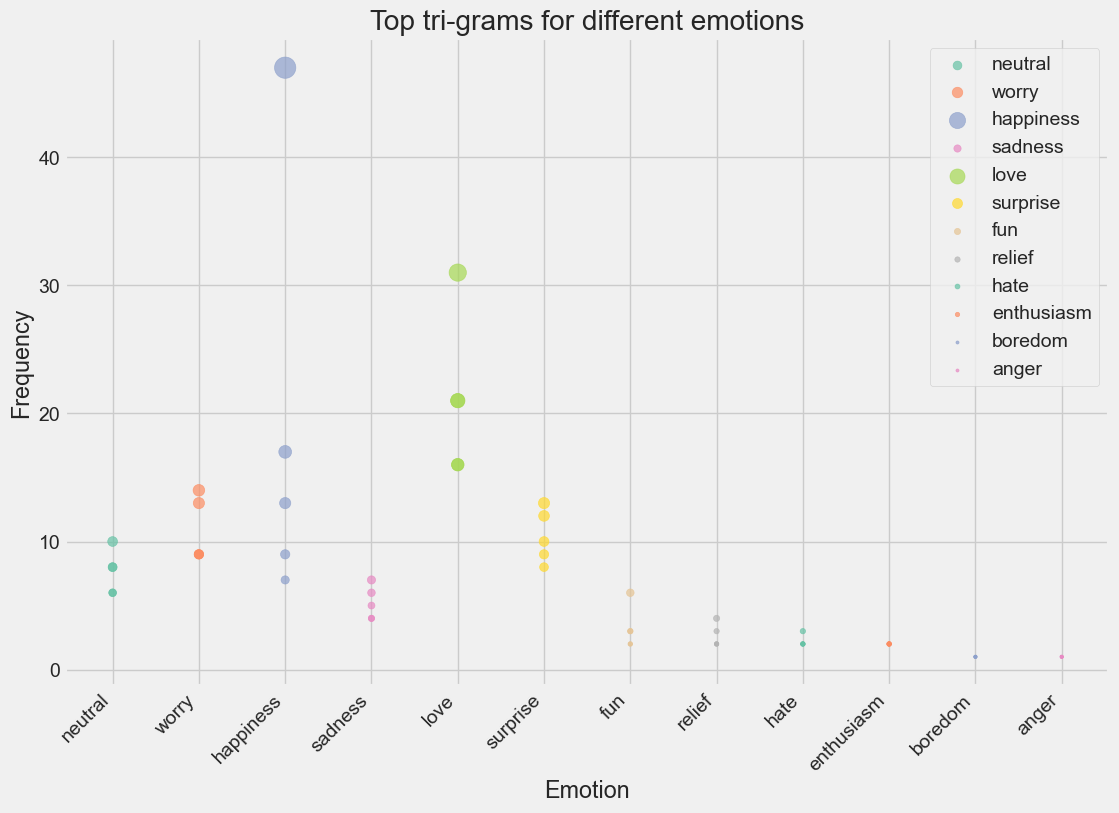

In [103]:
# Crear listas de datos para el gráfico
emotions = ['neutral', 'worry', 'happiness', 'sadness', 'love', 'surprise', 'fun', 'relief', 'hate', 'enthusiasm', 'boredom', 
            'anger']

unigram_freqs = [neutral_trigrams, worry_trigrams, happiness_trigrams, sadness_trigrams, love_trigrams, surprise_trigrams,  
                 fun_trigrams, relief_trigrams, hate_trigrams, enthusiasm_trigrams, boredom_trigrams, anger_trigrams]

# Crear el gráfico de burbujas
fig, ax = plt.subplots(figsize=(12, 8))

for i, emotion in enumerate(emotions):
    x = [emotion] * len(unigram_freqs[i])
    y = [unigram_freq[1] for unigram_freq in unigram_freqs[i]]
    sizes = [unigram_freq[1] * 5 for unigram_freq in unigram_freqs[i]]  # Ajustar el tamaño de la burbuja
    
    ax.scatter(x, y, s=sizes, alpha=0.7, label=emotion)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Top tri-grams for different emotions')

plt.legend()
plt.show()

**Observacion:** Estos gráficos muestran los n-gramas más frecuentes en los tweets clasificados por diferentes emociones. Los n-gramas son secuencias de palabras consecutivas de longitud n, y la frecuencia se refiere a cuántas veces aparece esa secuencia en los tweets de una emoción particular. El análisis de n-gramas puede ayudar a identificar las palabras o frases más asociadas con una emoción específica. 

Por ejemplo, el análisis muestra que para la emoción "feliz" los n-gramas más frecuentes son "día", "bueno" y "feliz", mientras que para la emoción "tristeza" son "no sé", "parece" y "trabajo". Este tipo de análisis puede ser útil para comprender cómo las personas expresan diferentes emociones en las redes sociales y para informar sobre la estrategia de marketing o publicidad en línea.

## 6. Observaciones generales

* El desbalance significativo entre las etiquetas de emociones en el conjunto de datos puede afectar negativamente el rendimiento de los algoritmos de machine learning utilizados para el análisis de sentimientos. 

* Los resultados sugieren que la clasificación de emociones del conjunto de datos original no está completamente en línea con las emociones identificadas en el análisis de sentimiento.

* Vader puede ser más adecuado para textos cortos, como los tweets, debido a que está diseñado para analizar el lenguaje informal y el uso de emociones.

* Los textos con polaridad negativa parecen ser más objetivos que subjetivos, ya que están más concentrados en la parte inferior del gráfico.

* Las palabras más comunes asociadas con la tristeza incluyen "amor", "siempre", "hoy", "día", "vida", "triste", "familia", "nadie", "solo" y "verdad".

* Las palabras más comunes asociadas con la felicidad incluyen "vida", "amor", "hoy", "siempre", "familia", "gracias", "mundo", "día", "buen" y "ser".

* El proceso de preprocesamiento de texto para dividir los tweets en palabras y contar su frecuencia es una técnica efectiva para analizar grandes conjuntos de datos de texto.

* Este análisis podría ser útil en campos como la psicología, la publicidad o la mercadotecnia para entender mejor cómo el lenguaje y las palabras utilizadas en las redes sociales están relacionadas con las emociones.

* La frecuencia de n-gramas en los tweets clasificados por diferentes emociones puede ayudar a identificar las palabras o frases más asociadas con una emoción específica. Este tipo de análisis puede ser útil para comprender cómo las personas expresan diferentes emociones en las redes sociales y para informar sobre la estrategia de marketing o publicidad en línea.

## Próximo paso:

Crearán los modelos de prediccion en función la siguientes clasificaciones:

* Emociones catalogadas del dataset original.

* Polaridad producto de transformar las emociones en sentimiento.

* Polaridad de Varder.